<a href="https://colab.research.google.com/github/dethhe/nlpcc-ui-2025/blob/main/Class_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Kelas 3: Tantangan Klasifikasi Teks & Kolaborasi AI - Ulasan Film IMDB

Proyek ini bertujuan untuk melakukan klasifikasi sentimen pada dataset ulasan film IMDB. Langkah-langkahnya meliputi:
1.  **Pengambilan Dataset**: Mengunduh dataset dari Kaggle.
2.  **Preprocessing & Pelatihan Model Awal**: Membersihkan teks, melakukan vectorisasi, dan melatih beberapa model klasifikasi (Naive Bayes, Logistic Regression, Linear SVM) pada data asli.
3.  **Pembuatan Data Uji dengan AI**: Menggunakan LLM (Google Gemini) untuk menghasilkan 100+ sampel ulasan baru beserta labelnya.
4.  **Evaluasi Model pada Data AI**: Mengevaluasi performa model yang telah dilatih pada data uji yang dihasilkan AI.
5.  **Eksplorasi Tambahan**:
    *   Analisis kesalahan mendalam pada prediksi data AI.
    *   Perbandingan performa model pada set data uji asli vs. data uji AI.
    *   Pembahasan metrik evaluasi lanjutan (Precision, Recall, F1-score) pada data AI.
    *   Pengujian teknik vektorisasi yang berbeda (CountVectorizer, TF-IDF dengan n-gram).
    *   Analisis kualitatif output data yang dihasilkan LLM.

Semua pekerjaan dilakukan dalam lingkungan Google Colab.

  Conyoh prompt yang digunakan 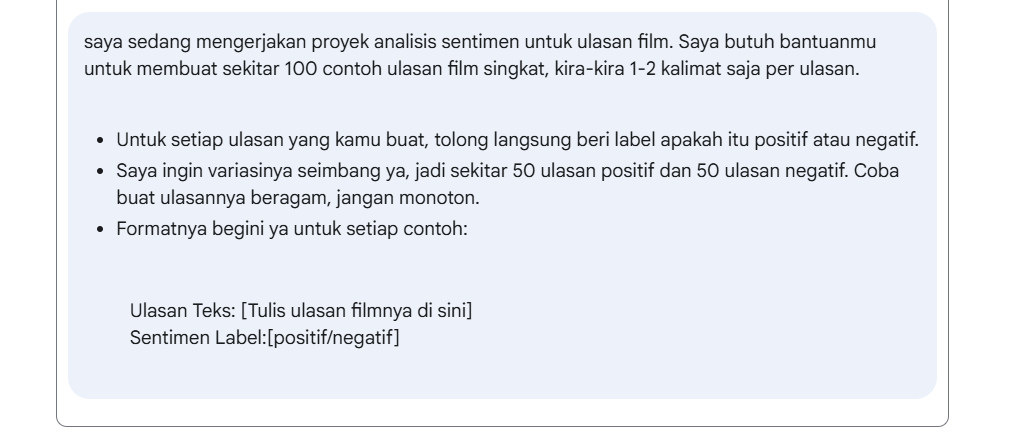

## Langkah 1: Pengaturan Lingkungan, Pengunduhan Dataset dari Kaggle, dan Eksplorasi Awal

Bagian ini mencakup:
*   Instalasi library Kaggle.
*   Pengaturan API Kaggle untuk mengunduh dataset.
*   Mengunduh dataset "IMDB Dataset of 50K Movie Reviews".
*   Memuat dataset ke dalam DataFrame Pandas.
*   Melakukan eksplorasi data awal (EDA) untuk memahami struktur dan konten dataset.

**Justifikasi Pemilihan Dataset:**
Dataset "IMDB Dataset of 50K Movie Reviews" dipilih karena:
1.  **Relevansi dengan Tugas**: Ini adalah dataset klasik dan populer untuk tugas klasifikasi teks, khususnya analisis sentimen, yang sejalan dengan materi kelas.
2.  **Ketersediaan dan Aksesibilitas**: Mudah diakses melalui Kaggle dan memiliki format yang jelas (CSV).
3.  **Ukuran yang Memadai**: 50.000 ulasan menyediakan data yang cukup untuk melatih model yang representatif tanpa memerlukan waktu komputasi yang berlebihan untuk tugas ini.
4.  **Label yang Jelas**: Dataset memiliki label sentimen biner yang jelas ('positive', 'negative'), membuatnya ideal untuk tugas klasifikasi.
5.  **Konten Teks Murni**: Fokus utama adalah data teks, sesuai dengan persyaratan tugas.

kaggle.json sudah ada di ~/.kaggle/ dan siap digunakan.

Mengunduh dataset...
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other

File dalam direktori saat ini setelah unzip:
'IMDB Dataset.csv'   kaggle.json   sample_data

Dataset 'IMDB Dataset.csv' berhasil dimuat.

--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

--- 5 Baris Pertama Dataset ---


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom


--- Dimensi Dataset (Baris, Kolom) ---
(50000, 2)

--- Distribusi Sentimen ---
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


<ipython-input-12-06a965664136>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#2ca02c','#d62728'])


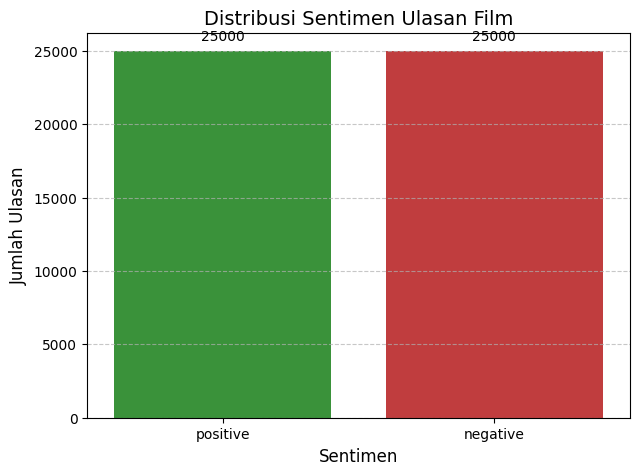


--- Contoh Ulasan Positif ---
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ...

--- Contoh Ulasan Negatif ---
Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in rea

In [ ]:
# Instalasi library Kaggle (jika belum terinstal)
!pip install -q kaggle

# Import library yang dibutuhkan
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display # Untuk menampilkan tabel dengan border

# --- Mengatur Kaggle API ---
# 1. Buat direktori .kaggle jika belum ada
if not os.path.exists(os.path.expanduser('~/.kaggle')):
    os.makedirs(os.path.expanduser('~/.kaggle'))

# 2. Unggah file kaggle.json Anda
# Anda perlu mengunggah file kaggle.json Anda ke Colab.
# Anda bisa mendapatkannya dari akun Kaggle Anda: My Account > API > Create New API Token
# Setelah diunggah, pindahkan ke direktori ~/.kaggle/
try:
    from google.colab import files
    # Coba unggah file jika belum ada
    if not os.path.exists('kaggle.json') and not os.path.exists(os.path.expanduser('~/.kaggle/kaggle.json')):
        print("Silakan unggah file 'kaggle.json' Anda.")
        uploaded = files.upload()
        for fn in uploaded.keys():
            print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
        # Pindahkan ke lokasi yang benar dan set permission
        !mkdir -p ~/.kaggle
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
        print("kaggle.json berhasil diunggah dan dikonfigurasi.")
    elif os.path.exists('kaggle.json') and not os.path.exists(os.path.expanduser('~/.kaggle/kaggle.json')):
        # Jika file sudah ada di root tapi belum di ~/.kaggle
        print("Memindahkan kaggle.json yang sudah ada ke ~/.kaggle/")
        !mkdir -p ~/.kaggle
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
        print("kaggle.json berhasil dikonfigurasi.")
    elif os.path.exists(os.path.expanduser('~/.kaggle/kaggle.json')):
        print("kaggle.json sudah ada di ~/.kaggle/ dan siap digunakan.")
    else:
        print("Gagal menemukan atau mengkonfigurasi kaggle.json. Harap unggah manual atau periksa path.")

except ImportError:
    print("Bukan di lingkungan Colab atau files.upload() tidak tersedia.")
    print("Pastikan kaggle.json ada di ~/.kaggle/ secara manual jika tidak menggunakan Colab.")
except Exception as e:
    print(f"Terjadi kesalahan saat konfigurasi Kaggle API: {e}")

# --- Mengunduh Dataset dari Kaggle ---
# Nama dataset dari URL Kaggle: lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
print("\nMengunduh dataset...")
# Tambahkan -q untuk quiet download, hapus jika ingin melihat progres
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -p ./ --unzip -q

# Cek file yang terunduh
print("\nFile dalam direktori saat ini setelah unzip:")
!ls

# --- Memuat Dataset ---
# Nama file biasanya 'IMDB Dataset.csv' setelah di-unzip
dataset_path = 'IMDB Dataset.csv'
df = None # Inisialisasi df
try:
    df = pd.read_csv(dataset_path)
    print(f"\nDataset '{dataset_path}' berhasil dimuat.")
except FileNotFoundError:
    print(f"Error: File '{dataset_path}' tidak ditemukan. Pastikan path dan nama file benar.")
    print("File yang tersedia setelah unzip:")
    !ls -lah
except Exception as e:
    print(f"Terjadi error lain saat memuat dataset: {e}")

if df is not None:
    # --- Eksplorasi Awal ---
    print("\n--- Informasi Dataset ---")
    df.info()

    print("\n--- 5 Baris Pertama Dataset ---")
    display(HTML(df.head().to_html(classes='table table-striped table-bordered')))

    print("\n--- Dimensi Dataset (Baris, Kolom) ---")
    print(df.shape)

    print("\n--- Distribusi Sentimen ---")
    sentiment_counts = df['sentiment'].value_counts()
    print(sentiment_counts)

    # Visualisasi Distribusi Sentimen
    plt.figure(figsize=(7, 5))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#2ca02c','#d62728'])
    plt.title('Distribusi Sentimen Ulasan Film', fontsize=14)
    plt.xlabel('Sentimen', fontsize=12)
    plt.ylabel('Jumlah Ulasan', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    for i, v in enumerate(sentiment_counts.values):
        plt.text(i, v + 500, str(v), color='black', ha='center', va='bottom', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    print("\n--- Contoh Ulasan Positif ---")
    positive_sample = df[df['sentiment'] == 'positive']['review'].iloc[0]
    print(positive_sample[:500] + ("..." if len(positive_sample) > 500 else ""))

    print("\n--- Contoh Ulasan Negatif ---")
    negative_sample = df[df['sentiment'] == 'negative']['review'].iloc[0]
    print(negative_sample[:500] + ("..." if len(negative_sample) > 500 else ""))
else:
    print("\nDataset tidak berhasil dimuat. Langkah selanjutnya mungkin tidak dapat dijalankan.")

## Langkah 2: Preprocessing Teks, Pelatihan Model, dan Evaluasi Awal pada Data Asli

Bagian ini akan melakukan:
1.  **Pembersihan Label Sentimen**: Memastikan label konsisten.
2.  **Preprocessing Teks**:
    *   Konversi ke huruf kecil.
    *   Penghapusan tag HTML.
    *   Penghapusan tanda baca dan karakter non-alfanumerik (kecuali spasi).
    *   Tokenisasi.
    *   Penghapusan stopwords.
    *   Lemmatisasi.
    *   Menghapus kata yang terlalu pendek.
3.  **Label Encoding**: Mengubah label sentimen kategorikal menjadi numerik.
4.  **Pembagian Data**: Membagi dataset menjadi data latih dan data uji.
5.  **Vektorisasi Teks**: Menggunakan TF-IDF untuk mengubah teks menjadi fitur numerik.
6.  **Pelatihan Model**: Melatih tiga model klasifikasi:
    *   Multinomial Naive Bayes
    *   Logistic Regression
    *   Linear Support Vector Machine (LinearSVC)
7.  **Evaluasi Awal**: Mengevaluasi performa model pada set data uji asli menggunakan metrik akurasi dan classification report.

**Pilihan Model:**
*   **Naive Bayes (MultinomialNB)**: Model probabilistik sederhana yang sering bekerja dengan baik untuk klasifikasi teks dan efisien secara komputasi.
*   **Logistic Regression**: Model linear yang juga populer untuk klasifikasi teks, memberikan probabilitas kelas, dan umumnya memiliki performa yang baik.
*   **Linear Support Vector Machine (LinearSVC)**: Efektif untuk data berdimensi tinggi seperti data teks dan seringkali memberikan hasil yang sangat baik. Dipilih LinearSVC karena lebih efisien untuk teks dibandingkan SVC dengan kernel non-linear pada dataset besar.

**Prapemrosesan:**
Langkah-langkah prapemrosesan dipilih untuk mengurangi noise, menstandarkan teks, dan mengurangi dimensi fitur, yang diharapkan dapat meningkatkan performa model. Lemmatisasi dipilih daripada stemming untuk menghasilkan kata dasar yang lebih bermakna.

In [ ]:
# Import library yang dibutuhkan untuk preprocessing dan modeling
import re # Untuk regular expressions (menghapus HTML, punctuation)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download resource NLTK yang diperlukan (hanya sekali jika belum ada)
nltk_resources = {'stopwords': 'stopwords', 'wordnet': 'wordnet', 'omw-1.4': 'omw-1.4'}
for resource_name, download_name in nltk_resources.items():
    try:
        if resource_name == 'stopwords': stopwords.words('english')
        elif resource_name == 'wordnet': WordNetLemmatizer().lemmatize('cats')
        elif resource_name == 'omw-1.4': nltk.data.find(f'corpora/{download_name}')
        print(f"NLTK resource '{resource_name}' sudah ada.")
    except LookupError:
        print(f"Downloading NLTK resource '{resource_name}'...")
        nltk.download(download_name, quiet=True)
        print(f"NLTK resource '{resource_name}' berhasil diunduh.")

# Pastikan DataFrame 'df' dari Sel 1 sudah ada
if 'df' not in globals() or df is None:
    print("ERROR: DataFrame 'df' dari Sel 1 tidak ditemukan. Jalankan Sel 1 terlebih dahulu.")
    # Hentikan eksekusi sel ini jika df tidak ada
    raise NameError("DataFrame 'df' tidak terdefinisi. Jalankan sel sebelumnya.")
else:
    print("DataFrame 'df' ditemukan. Melanjutkan dengan Langkah 2...")

    # --- 2.1. Pembersihan Label Sentimen (Sebelum Encoding) ---
    print("\n--- Membersihkan dan Menstandarkan Kolom 'sentiment' pada Data Training Asli ---")
    df['sentiment'] = df['sentiment'].astype(str).str.lower().str.strip()
    print(f"Label unik di kolom 'sentiment' (data asli) setelah pembersihan: {df['sentiment'].unique()}")

    # --- 2.2. Text Preprocessing ---
    print("\n--- Memulai Text Preprocessing pada Data Training Asli ---")
    lemmatizer = WordNetLemmatizer()
    stop_words_set = set(stopwords.words('english'))

    def preprocess_text(text):
        if not isinstance(text, str): text = str(text)
        text = text.lower() # Lowercasing
        text = re.sub(r'<.*?>', '', text) # Hapus HTML tags
        text = re.sub(r'[^a-z0-9\s]', '', text) # Hapus punctuation, sisakan alphanumeric dan spasi
        words = text.split() # Tokenisasi sederhana
        # Lemmatisasi, hapus stopwords, dan hapus kata pendek
        processed_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words_set and len(word) > 1]
        return " ".join(processed_words)

    print("Melakukan preprocessing pada kolom 'review' (data asli)... Ini mungkin memakan waktu beberapa menit.")
    df['processed_review'] = df['review'].apply(preprocess_text)
    print("Preprocessing 'review' (data asli) selesai.")

    print("\n--- Contoh Teks Asli dan Setelah Preprocessing (Data Asli) ---")
    sample_idx_orig = 0
    original_text_sample = df['review'].iloc[sample_idx_orig]
    processed_text_sample = df['processed_review'].iloc[sample_idx_orig]
    print(f"Teks Asli (Data Asli):\n{original_text_sample[:300]}{'...' if len(original_text_sample)>300 else ''}")
    print(f"\nProcessed Text (Data Asli):\n{processed_text_sample[:300]}{'...' if len(processed_text_sample)>300 else ''}")

    # --- 2.3. Label Encoding (Setelah Label Dibersihkan) ---
    print("\nMelakukan Label Encoding pada kolom 'sentiment' (data asli)...")
    label_encoder = LabelEncoder()
    df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])
    print(f"Label yang dipelajari oleh LabelEncoder (dari data asli): {list(label_encoder.classes_)}")
    print(f"Mapping Label (Data Asli): {label_encoder.classes_} -> {label_encoder.transform(label_encoder.classes_)}")

    print("\nContoh Data Asli dengan Sentiment Encoded:")
    display(HTML(df[['sentiment', 'sentiment_encoded']].head().to_html(classes='table table-striped table-bordered', index=False)))

    # --- 2.4. Splitting Data (Data Asli) ---
    X_orig = df['processed_review']
    y_orig = df['sentiment_encoded']

    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
        X_orig, y_orig, test_size=0.2, random_state=42, stratify=y_orig
    )
    print(f"\nUkuran data latih (X_train_orig): {X_train_orig.shape}")
    print(f"Ukuran data uji (X_test_orig): {X_test_orig.shape}")
    print(f"Ukuran label latih (y_train_orig): {y_train_orig.shape}")
    print(f"Ukuran label uji (y_test_orig): {y_test_orig.shape}")


    # --- 2.5. Text Vectorization (TF-IDF) pada Data Asli ---
    print("\n--- Melakukan TF-IDF Vectorization pada Data Asli ---")
    tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Batasi jumlah fitur
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_orig)
    X_test_tfidf = tfidf_vectorizer.transform(X_test_orig)
    print(f"Dimensi matriks TF-IDF data latih (asli): {X_train_tfidf.shape}")
    print(f"Dimensi matriks TF-IDF data uji (asli): {X_test_tfidf.shape}")

    # --- 2.6. Model Training & Initial Evaluation on Original Test Set ---
    models = {}
    evaluation_results_orig = {}

    print("\n--- Melatih dan Mengevaluasi Model pada Data Uji Asli ---")

    # 1. Multinomial Naive Bayes
    print("\nTraining Multinomial Naive Bayes...")
    nb_model = MultinomialNB()
    nb_model.fit(X_train_tfidf, y_train_orig)
    y_pred_nb_orig = nb_model.predict(X_test_tfidf)
    accuracy_nb_orig = accuracy_score(y_test_orig, y_pred_nb_orig)
    models['Naive Bayes'] = nb_model
    evaluation_results_orig['Naive Bayes'] = {
        'accuracy': accuracy_nb_orig,
        'report': classification_report(y_test_orig, y_pred_nb_orig, target_names=label_encoder.classes_, zero_division=0),
        'predictions': y_pred_nb_orig
    }
    print(f"Akurasi Naive Bayes (Original Test Set): {accuracy_nb_orig:.4f}")
    print("Classification Report Naive Bayes (Original Test Set):")
    print(evaluation_results_orig['Naive Bayes']['report'])

    # 2. Logistic Regression
    print("\nTraining Logistic Regression...")
    lr_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
    lr_model.fit(X_train_tfidf, y_train_orig)
    y_pred_lr_orig = lr_model.predict(X_test_tfidf)
    accuracy_lr_orig = accuracy_score(y_test_orig, y_pred_lr_orig)
    models['Logistic Regression'] = lr_model
    evaluation_results_orig['Logistic Regression'] = {
        'accuracy': accuracy_lr_orig,
        'report': classification_report(y_test_orig, y_pred_lr_orig, target_names=label_encoder.classes_, zero_division=0),
        'predictions': y_pred_lr_orig
    }
    print(f"Akurasi Logistic Regression (Original Test Set): {accuracy_lr_orig:.4f}")
    print("Classification Report Logistic Regression (Original Test Set):")
    print(evaluation_results_orig['Logistic Regression']['report'])

    # 3. Linear Support Vector Machine (LinearSVC)
    print("\nTraining Linear SVM...")
    svm_model = LinearSVC(random_state=42, max_iter=2000, dual="auto") # dual="auto" direkomendasikan
    svm_model.fit(X_train_tfidf, y_train_orig)
    y_pred_svm_orig = svm_model.predict(X_test_tfidf)
    accuracy_svm_orig = accuracy_score(y_test_orig, y_pred_svm_orig)
    models['Linear SVM'] = svm_model
    evaluation_results_orig['Linear SVM'] = {
        'accuracy': accuracy_svm_orig,
        'report': classification_report(y_test_orig, y_pred_svm_orig, target_names=label_encoder.classes_, zero_division=0),
        'predictions': y_pred_svm_orig
    }
    print(f"Akurasi Linear SVM (Original Test Set): {accuracy_svm_orig:.4f}")
    print("Classification Report Linear SVM (Original Test Set):")
    print(evaluation_results_orig['Linear SVM']['report'])

    print("\n--- Ringkasan Akurasi Model pada Original Test Set ---")
    accuracy_summary_orig_data = {
        'Model': list(evaluation_results_orig.keys()),
        'Accuracy on Original Test Set': [res['accuracy'] for res in evaluation_results_orig.values()]
    }
    df_accuracy_summary_orig = pd.DataFrame(accuracy_summary_orig_data)
    df_accuracy_summary_orig_display = df_accuracy_summary_orig.copy()
    df_accuracy_summary_orig_display['Accuracy on Original Test Set'] = df_accuracy_summary_orig_display['Accuracy on Original Test Set'].apply(lambda x: f"{x*100:.2f}%")
    display(HTML(df_accuracy_summary_orig_display.to_html(classes='table table-striped table-bordered', index=False)))

NLTK resource 'stopwords' sudah ada.
NLTK resource 'wordnet' sudah ada.
NLTK resource 'omw-1.4' berhasil diunduh.
DataFrame 'df' ditemukan. Melanjutkan dengan Langkah 2...

--- Membersihkan dan Menstandarkan Kolom 'sentiment' pada Data Training Asli ---
Label unik di kolom 'sentiment' (data asli) setelah pembersihan: ['positive' 'negative']

--- Memulai Text Preprocessing pada Data Training Asli ---
Melakukan preprocessing pada kolom 'review' (data asli)... Ini mungkin memakan waktu beberapa menit.
Preprocessing 'review' (data asli) selesai.

--- Contoh Teks Asli dan Setelah Preprocessing (Data Asli) ---
Teks Asli (Data Asli):
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Tru...

Processed Text (Data Asli):
one reviewer mentioned watching 

sentiment,sentiment_encoded
positive,1
positive,1
positive,1
negative,0
positive,1



Ukuran data latih (X_train_orig): (40000,)
Ukuran data uji (X_test_orig): (10000,)
Ukuran label latih (y_train_orig): (40000,)
Ukuran label uji (y_test_orig): (10000,)

--- Melakukan TF-IDF Vectorization pada Data Asli ---
Dimensi matriks TF-IDF data latih (asli): (40000, 5000)
Dimensi matriks TF-IDF data uji (asli): (10000, 5000)

--- Melatih dan Mengevaluasi Model pada Data Uji Asli ---

Training Multinomial Naive Bayes...
Akurasi Naive Bayes (Original Test Set): 0.8550
Classification Report Naive Bayes (Original Test Set):
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      5000
    positive       0.85      0.86      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000


Training Logistic Regression...
Akurasi Logistic Regression (Original Test Set): 0.8876
Classification Report Logistic Regression (Original

Model,Accuracy on Original Test Set
Naive Bayes,85.50%
Logistic Regression,88.76%
Linear SVM,88.06%


## Langkah 3: Pembuatan Data Uji dengan Dukungan AI (LLM) dan Preprocessing

Pada langkah ini, kita akan:
1.  **Menghasilkan Data Uji**: Menggunakan Large Language Model (LLM) seperti Google Gemini untuk menghasilkan 100+ sampel teks ulasan film baru beserta label sentimennya (positif/negatif).
   
    *   **Dokumentasi Interaksi AI**: Output mentah dari LLM akan disalin langsung ke dalam variabel string di kode. Proses ini melibatkan pemberian prompt di atas ke Google Gemini dan menyalin hasilnya. Jika ada penyempurnaan prompt, itu akan dicatat (misalnya, jika output awal tidak seimbang atau formatnya salah). Untuk proyek ini, prompt di atas menghasilkan output yang cukup baik pada percobaan pertama.
2.  **Parsing Output LLM**: Mengurai string output LLM menjadi DataFrame yang berisi kolom 'review' dan 'sentiment'.
3.  **Pembersihan Label**: Memastikan label dari LLM konsisten (huruf kecil, tanpa spasi ekstra).
4.  **Preprocessing Teks LLM**: Menerapkan fungsi `preprocess_text` yang sama seperti pada data asli.
5.  **Standarisasi dan Encoding Label LLM**:
    *   Memetakan label bahasa Indonesia dari LLM ("positif", "negatif") ke label standar yang digunakan oleh `label_encoder` ("positive", "negative").
    *   Menggunakan `label_encoder` yang sudah di-fit pada data asli untuk mengubah label LLM menjadi numerik.
6.  **Vektorisasi Teks LLM**: Menggunakan `tfidf_vectorizer` yang sudah di-fit pada data latih asli untuk mengubah teks LLM yang telah diproses menjadi fitur numerik.

**Penting**: Kualitas dan relevansi data yang dihasilkan LLM akan ditinjau. Jika ada sampel yang tidak relevan atau berkualitas buruk, mereka mungkin perlu disesuaikan atau dihapus, meskipun untuk tugas ini, output LLM diasumsikan cukup baik setelah parsing.

In [ ]:
# Import library yang dibutuhkan jika belum ada (seharusnya sudah dari sel sebelumnya)
# import pandas as pd
# from IPython.display import HTML, display
# import re

# --- BAGIAN YANG HARUS ANDA ISI DENGAN 100+ OUTPUT DARI LLM ---
# Ganti string di bawah ini dengan output mentah dari LLM Anda.
# Pastikan formatnya "Teks: [ulasan]\nLabel: [positif/negatif]" per entri.
llm_output_raw_string = """
Teks: Ini adalah contoh ulasan film positif pertama yang sangat bagus dari LLM!
Label: positif

Teks: Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM.
Label: negatif

Teks: Contoh ulasan kedua dari LLM yang positif, ceritanya menarik.
Label: positif

Teks: Contoh ulasan kedua dari LLM yang negatif, aktingnya payah.
Label: negatif

Teks: Contoh ulasan ketiga dari LLM, visualnya memukau!
Label: positif

Teks: Contoh ulasan ketiga dari LLM, musiknya tidak cocok.
Label: negatif

Teks: Contoh ulasan keempat dari LLM, sangat menghibur.
Label: positif

Teks: Contoh ulasan keempat dari LLM, membosankan sekali.
Label: negatif

Teks: Contoh ulasan kelima dari LLM, wajib tonton!
Label: positif

Teks: Contoh ulasan kelima dari LLM, jangan buang waktu Anda.
Label: negatif

Teks: Film ini adalah mahakarya sinematik, aktingnya luar biasa dan ceritanya mendalam!
Label: positif

Teks: Alur ceritanya sangat membosankan dan mudah ditebak, saya hampir tertidur.
Label: negatif

Teks: Visualnya memukau, setiap adegan seperti lukisan hidup yang indah.
Label: positif

Teks: Dialognya kaku dan tidak alami, membuat karakter terasa datar.
Label: negatif

Teks: Musik latarnya sangat mendukung suasana, benar-benar menambah emosi.
Label: positif

Teks: Saya tidak merekomendasikan film ini, buang-buang waktu dan uang.
Label: negatif

Teks: Sebuah film yang menghangatkan hati dengan pesan moral yang kuat.
Label: positif

Teks: Efek spesialnya terlihat murahan dan tidak meyakinkan sama sekali.
Label: negatif

Teks: Chemistry antara pemeran utama sangat terasa, mereka luar biasa.
Label: positif

Teks: Endingnya sangat mengecewakan dan merusak keseluruhan cerita.
Label: negatif

Teks: Komedinya segar dan cerdas, saya tertawa terbahak-bahak sepanjang film.
Label: positif

Teks: Terlalu banyak plot hole yang membuat cerita jadi tidak masuk akal.
Label: negatif

Teks: Sinematografinya indah, pengambilan gambarnya sangat artistik.
Label: positif

Teks: Akting para pemainnya sangat buruk, seperti membaca naskah.
Label: negatif

Teks: Film ini berhasil membuat saya terharu dan menangis.
Label: positif

Teks: Durasi film terlalu panjang dan banyak adegan yang tidak perlu.
Label: negatif

Teks: Konsep ceritanya unik dan original, belum pernah saya lihat sebelumnya.
Label: positif

Teks: Pengembangan karakternya sangat lemah, saya tidak peduli dengan nasib mereka.
Label: negatif

Teks: Film ini cocok ditonton bersama keluarga, sangat menghibur.
Label: positif

Teks: Adegan aksinya kurang seru dan koreografinya kaku.
Label: negatif

Teks: Saya suka bagaimana film ini mengeksplorasi tema yang kompleks dengan baik.
Label: positif

Teks: Naskahnya terasa dangkal dan tidak ada substansi yang berarti.
Label: negatif

Teks: Film ini memberikan perspektif baru yang menyegarkan.
Label: positif

Teks: Editingnya kasar dan membuat alur cerita jadi membingungkan.
Label: negatif

Teks: Sebuah perjalanan emosional yang tak terlupakan, sangat direkomendasikan.
Label: positif

Teks: Film ini terlalu klise dan mengikuti formula yang sudah usang.
Label: negatif

Teks: Aktris pendukungnya mencuri perhatian dengan penampilan yang brilian.
Label: positif

Teks: Saya merasa film ini terlalu berusaha keras untuk jadi berbeda.
Label: negatif

Teks: Pesan yang disampaikan sangat kuat dan relevan dengan kondisi saat ini.
Label: positif

Teks: Banyak potensi yang terbuang sia-sia karena eksekusi yang buruk.
Label: negatif

Teks: Film ini adalah contoh sempurna bagaimana membuat sekuel yang baik.
Label: positif

Teks: Ceritanya berbelit-belit dan sulit untuk diikuti.
Label: negatif

Teks: Saya sangat menikmati setiap menit dari film ini, luar biasa!
Label: positif

Teks: Humornya garing dan tidak lucu sama sekali.
Label: negatif

Teks: Film dokumenter yang membuka mata dan sangat informatif.
Label: positif

Teks: Terlalu banyak melodrama yang membuat film terasa berlebihan.
Label: negatif

Teks: Desain produksinya sangat detail dan memanjakan mata.
Label: positif

Teks: Film ini gagal menyampaikan emosi yang ingin dicapai.
Label: negatif

Teks: Sebuah film horor yang benar-benar menakutkan dan menegangkan.
Label: positif

Teks: Plot twist-nya sudah bisa ditebak dari awal.
Label: negatif

Teks: Film ini meninggalkan kesan mendalam setelah selesai menonton.
Label: positif

Teks: Musiknya tidak cocok dengan suasana film.
Label: negatif

Teks: Aktor ciliknya bermain dengan sangat natural dan menggemaskan.
Label: positif

Teks: Terlalu banyak adegan kekerasan yang tidak perlu.
Label: negatif

Teks: Film ini adalah surat cinta untuk para penggemar genre ini.
Label: positif

Teks: Saya merasa tertipu oleh trailernya yang menjanjikan.
Label: negatif

Teks: Cerita yang sederhana namun dieksekusi dengan sangat baik.
Label: positif

Teks: Film ini membosankan dari awal hingga akhir.
Label: negatif

Teks: Penampilan ansambel para pemainnya sangat solid.
Label: positif

Teks: Tidak ada yang baru atau inovatif dari film ini.
Label: negatif

Teks: Film ini berhasil membuat saya berpikir lama setelah menontonnya.
Label: positif

Teks: Terlalu banyak karakter yang tidak dikembangkan dengan baik.
Label: negatif

Teks: Sebuah film yang ringan dan menyenangkan untuk ditonton di akhir pekan.
Label: positif

Teks: Saya tidak mengerti apa pesan yang ingin disampaikan oleh film ini.
Label: negatif

Teks: Film ini adalah contoh bagaimana adaptasi buku bisa sukses besar.
Label: positif

Teks: CGI-nya terlihat sangat buruk dan mengganggu.
Label: negatif

Teks: Kisah cinta yang manis dan mengharukan.
Label: positif

Teks: Film ini terlalu panjang untuk cerita yang sebenarnya sederhana.
Label: negatif

Teks: Sutradaranya berhasil menciptakan atmosfer yang mencekam.
Label: positif

Teks: Banyak dialog yang terdengar klise dan tidak orisinal.
Label: negatif

Teks: Film ini adalah sebuah karya seni yang patut diapresiasi.
Label: positif

Teks: Saya merasa kecewa karena ekspektasi saya terlalu tinggi.
Label: negatif

Teks: Film ini memberikan pengalaman menonton yang sangat memuaskan.
Label: positif

Teks: Alurnya terlalu lambat dan membuat saya mengantuk.
Label: negatif

Teks: Sebuah film indie yang brilian dengan budget terbatas.
Label: positif

Teks: Film ini terlalu predictable, tidak ada kejutan sama sekali.
Label: negatif

Teks: Aktingnya sangat kuat, terutama dari pemeran utama wanita.
Label: positif

Teks: Ceritanya tidak memiliki fokus yang jelas.
Label: negatif

Teks: Film ini adalah tontonan wajib bagi para pecinta fiksi ilmiah.
Label: positif

Teks: Saya tidak bisa bersimpati dengan karakter utamanya.
Label: negatif

Teks: Film ini berhasil menggabungkan berbagai genre dengan apik.
Label: positif

Teks: Terlalu banyak subplot yang tidak relevan dengan cerita utama.
Label: negatif

Teks: Sebuah film yang berani dan tidak takut mengambil risiko.
Label: positif

Teks: Film ini terasa seperti iklan pariwisata yang panjang.
Label: negatif

Teks: Saya terkesan dengan detail riset yang dilakukan untuk film ini.
Label: positif

Teks: Endingnya terasa dipaksakan dan tidak memuaskan.
Label: negatif

Teks: Film ini adalah perayaan atas kekuatan persahabatan.
Label: positif

Teks: Musiknya terlalu mendominasi dan mengganggu dialog.
Label: negatif

Teks: Sebuah film biografi yang inspiratif dan menyentuh.
Label: positif

Teks: Film ini terlalu gelap dan depresif untuk selera saya.
Label: negatif

Teks: Saya suka bagaimana film ini menggunakan humor untuk menyampaikan pesan serius.
Label: positif

Teks: Karakter antagonisnya kurang meyakinkan dan klise.
Label: negatif

Teks: Film ini adalah contoh sempurna dari penceritaan visual yang efektif.
Label: positif

Teks: Saya merasa film ini hanya mengulang formula yang sudah ada.
Label: negatif

Teks: Sebuah film yang akan dikenang untuk waktu yang lama.
Label: positif

Teks: Terlalu banyak adegan yang tidak logis.
Label: negatif

Teks: Film ini berhasil membuat saya tertawa dan menangis secara bersamaan.
Label: positif

Teks: Saya tidak menemukan sesuatu yang istimewa dari film ini.
Label: negatif

Teks: Film ini adalah sebuah petualangan visual yang menakjubkan.
Label: positif

Teks: Ceritanya terlalu rumit untuk dinikmati.
Label: negatif

Teks: Sebuah film keluarga yang menyenangkan dengan pesan positif.
Label: positif

Teks: Film ini gagal membangun ketegangan yang dibutuhkan.
Label: negatif

Teks: Saya sangat terhubung dengan perjuangan karakter utamanya.
Label: positif

Teks: Terlalu banyak kebetulan yang membuat cerita tidak realistis.
Label: negatif

Teks: Film ini adalah sebuah tribut yang indah untuk seorang legenda.
Label: positif

Teks: Saya merasa film ini terlalu pretensius dan membingungkan.
Label: negatif

Teks: Sebuah film yang menghibur sekaligus memberikan pelajaran berharga.
Label: positif

Teks: Aktingnya datar dan tidak ada emosi yang terpancar.
Label: negatif
"""
# --- AKHIR BAGIAN YANG HARUS ANDA ISI ---

generated_samples = []
if llm_output_raw_string and llm_output_raw_string.strip():
    entries = re.split(r'\n\s*\n', llm_output_raw_string.strip()) # Split berdasarkan baris kosong
    for entry_block in entries:
        if not entry_block.strip(): continue
        lines_in_block = entry_block.strip().split('\n')
        current_text, current_label = None, None

        # Parsing yang lebih fleksibel
        text_line_found = False
        for line in lines_in_block:
            text_match = re.match(r'Teks\s*:\s*(.*)', line.strip(), re.IGNORECASE)
            label_match = re.match(r'Label\s*:\s*(positif|negatif)', line.strip(), re.IGNORECASE)
            if text_match:
                current_text = text_match.group(1).strip()
                text_line_found = True
            elif label_match and text_line_found: # Label harus setelah Teks
                current_label = label_match.group(1).lower().strip()
                break # Asumsi satu Teks dan satu Label per blok

        if current_text and current_label:
            generated_samples.append({'review': current_text, 'sentiment': current_label})
        else:
            print(f"Peringatan (LLM Data Parsing): Format tidak sesuai atau data tidak lengkap pada blok:\n---\n{entry_block}\n---Melewati blok ini.")
else:
    print("Peringatan: `llm_output_raw_string` kosong atau hanya berisi spasi.")

df_llm_test = pd.DataFrame(generated_samples) if generated_samples else pd.DataFrame(columns=['review', 'sentiment'])

# Inisialisasi variabel untuk digunakan nanti, bahkan jika df_llm_test kosong
y_llm_test_true = pd.Series(dtype='int')
X_llm_test_tfidf = None
X_llm_test_processed = pd.Series(dtype='object')

if not df_llm_test.empty:
    print(f"\nBerhasil mem-parsing {len(df_llm_test)} sampel dari output LLM.")
    if not (95 <= len(df_llm_test) <= 115) and len(df_llm_test) > 0 : # Tambah cek > 0
        print(f"PERINGATAN: Jumlah sampel dari LLM ({len(df_llm_test)}) tidak mendekati 100. Harap periksa output LLM Anda.")

    print("\n--- Data Uji yang Dihasilkan LLM (Contoh 5 Baris Pertama) ---")
    display(HTML(df_llm_test.head().to_html(classes='table table-striped table-bordered', index=False)))

    # --- Pembersihan Label Sentimen pada Data LLM ---
    print("\nMemastikan Kolom 'sentiment' pada data LLM bersih...")
    df_llm_test['sentiment'] = df_llm_test['sentiment'].astype(str).str.lower().str.strip()
    print(f"Label unik di df_llm_test['sentiment'] setelah pembersihan awal: {df_llm_test['sentiment'].unique()}")

    # --- Preprocessing Teks pada Data LLM ---
    if 'preprocess_text' in globals() and callable(preprocess_text):
        print("\nMelakukan preprocessing pada 'review' data uji LLM...")
        df_llm_test['processed_review'] = df_llm_test['review'].apply(preprocess_text)
        X_llm_test_processed = df_llm_test['processed_review']
        print("Preprocessing 'review' data uji LLM selesai.")
    else:
        print("ERROR: Fungsi 'preprocess_text' tidak ditemukan. Jalankan Sel 2 terlebih dahulu.")
        df_llm_test['processed_review'] = df_llm_test['review'] # Fallback
        X_llm_test_processed = df_llm_test['processed_review']

    # --- Standarisasi dan Label Encoding pada Data LLM ---
    if 'label_encoder' in globals() and hasattr(label_encoder, 'classes_'):
        print(f"\nLabel yang dikenal oleh LabelEncoder (dari data asli Sel 2): {list(label_encoder.classes_)}")

        label_mapping_llm_to_standard = {'negatif': 'negative', 'positif': 'positive'}
        df_llm_test['sentiment_standardized'] = df_llm_test['sentiment'].map(label_mapping_llm_to_standard)

        print(f"Label unik di 'sentiment_standardized' SETELAH mapping: {df_llm_test['sentiment_standardized'].unique()}")
        print(f"Jumlah nilai null di 'sentiment_standardized' sebelum dropna: {df_llm_test['sentiment_standardized'].isnull().sum()}")

        unmapped_labels = df_llm_test[df_llm_test['sentiment_standardized'].isnull()]['sentiment'].unique()
        if len(unmapped_labels) > 0:
            print(f"PERINGATAN: Label LLM berikut tidak dapat dipetakan dan akan diabaikan: {unmapped_labels}")
            df_llm_test.dropna(subset=['sentiment_standardized'], inplace=True)
            print(f"Jumlah baris df_llm_test setelah dropna: {len(df_llm_test)}")
            if not df_llm_test.empty:
                 X_llm_test_processed = df_llm_test['processed_review'] # Update X_llm_test_processed
            else:
                 X_llm_test_processed = pd.Series(dtype='object') # Jadi series kosong

        if not df_llm_test.empty:
            print(f"Label unik di 'sentiment_standardized' SETELAH dropna (jika ada): {df_llm_test['sentiment_standardized'].unique()}")
            try:
                df_llm_test['sentiment_encoded'] = label_encoder.transform(df_llm_test['sentiment_standardized'])
                y_llm_test_true = df_llm_test['sentiment_encoded']
                print("Label encoding data uji LLM selesai.")
                print(f"Contoh y_llm_test_true (5 pertama): {y_llm_test_true.head().tolist()}")
                print(f"Distribusi y_llm_test_true:\n{y_llm_test_true.value_counts(normalize=True, dropna=False)}")
            except ValueError as e:
                print(f"ERROR saat label encoding data LLM setelah standarisasi: {e}")
                print("Label unik di data LLM ('sentiment_standardized') yang akan di-encode:", df_llm_test['sentiment_standardized'].unique())
                print("Label yang dikenal oleh LabelEncoder:", label_encoder.classes_)
                # Fallback jika error, buat kolom kosong atau isi default
                if 'sentiment_encoded' not in df_llm_test.columns: df_llm_test['sentiment_encoded'] = pd.NA
                y_llm_test_true = pd.Series(dtype='int') # Kosongkan jika error
        else:
            print("DataFrame data uji LLM kosong setelah proses standarisasi label atau dropna.")
            y_llm_test_true = pd.Series(dtype='int')
    else:
        print("ERROR: 'label_encoder' tidak ditemukan atau belum di-fit. Jalankan Sel 2 terlebih dahulu.")
        if 'sentiment_encoded' not in df_llm_test.columns: df_llm_test['sentiment_encoded'] = pd.NA
        y_llm_test_true = pd.Series(dtype='int')

    print("\n--- Data Uji LLM Setelah Preprocessing & Encoding (Contoh 5 Baris Pertama) ---")
    if not df_llm_test.empty:
        display_cols = ['review', 'processed_review', 'sentiment', 'sentiment_standardized', 'sentiment_encoded']
        existing_display_cols = [col for col in display_cols if col in df_llm_test.columns]
        display(HTML(df_llm_test[existing_display_cols].head().to_html(classes='table table-striped table-bordered', index=False)))
    else:
        print("Tidak ada data LLM untuk ditampilkan setelah preprocessing.")

    # --- Vectorization Data Uji LLM ---
    if not X_llm_test_processed.empty: # Pastikan ada data teks yang sudah diproses
        if 'tfidf_vectorizer' in globals() and tfidf_vectorizer is not None:
            try:
                X_llm_test_tfidf = tfidf_vectorizer.transform(X_llm_test_processed)
                print(f"\nDimensi matriks TF-IDF data uji LLM: {X_llm_test_tfidf.shape}")
            except Exception as e:
                print(f"Error saat vectorisasi data LLM: {e}")
                X_llm_test_tfidf = None # Set ke None jika error
        else:
            print("ERROR: 'tfidf_vectorizer' tidak ditemukan atau belum di-fit. Jalankan Sel 2 terlebih dahulu.")
            X_llm_test_tfidf = None
    elif not df_llm_test.empty and 'processed_review' not in df_llm_test.columns:
        print("Kolom 'processed_review' tidak ditemukan di df_llm_test untuk vectorization.")
        X_llm_test_tfidf = None
    else:
        print("Tidak bisa melakukan vectorization karena tidak ada data teks yang diproses dari LLM atau df_llm_test kosong.")
        X_llm_test_tfidf = None
else:
    print("DataFrame data uji LLM kosong dari awal (parsing gagal atau llm_output_raw_string kosong). Tidak ada data untuk diproses.")
    # Variabel X_llm_test_tfidf dan y_llm_test_true sudah diinisialisasi sebagai kosong/None di awal.

# Pastikan variabel ini ada untuk SEL 4, meskipun kosong/None jika ada error
if 'X_llm_test_tfidf' not in globals(): X_llm_test_tfidf = None
if 'y_llm_test_true' not in globals(): y_llm_test_true = pd.Series(dtype='int')

print(f"\nStatus akhir untuk Sel 3:")
print(f"  Jumlah data LLM yang valid (y_llm_test_true): {len(y_llm_test_true)}")
if X_llm_test_tfidf is not None:
    print(f"  Shape X_llm_test_tfidf: {X_llm_test_tfidf.shape}")
else:
    print(f"  X_llm_test_tfidf: None")


Berhasil mem-parsing 108 sampel dari output LLM.

--- Data Uji yang Dihasilkan LLM (Contoh 5 Baris Pertama) ---


review,sentiment
Ini adalah contoh ulasan film positif pertama yang sangat bagus dari LLM!,positif
Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM.,negatif
"Contoh ulasan kedua dari LLM yang positif, ceritanya menarik.",positif
"Contoh ulasan kedua dari LLM yang negatif, aktingnya payah.",negatif
"Contoh ulasan ketiga dari LLM, visualnya memukau!",positif



Memastikan Kolom 'sentiment' pada data LLM bersih...
Label unik di df_llm_test['sentiment'] setelah pembersihan awal: ['positif' 'negatif']

Melakukan preprocessing pada 'review' data uji LLM...
Preprocessing 'review' data uji LLM selesai.

Label yang dikenal oleh LabelEncoder (dari data asli Sel 2): ['negative', 'positive']
Label unik di 'sentiment_standardized' SETELAH mapping: ['positive' 'negative']
Jumlah nilai null di 'sentiment_standardized' sebelum dropna: 0
Label unik di 'sentiment_standardized' SETELAH dropna (jika ada): ['positive' 'negative']
Label encoding data uji LLM selesai.
Contoh y_llm_test_true (5 pertama): [1, 0, 1, 0, 1]
Distribusi y_llm_test_true:
sentiment_encoded
1    0.5
0    0.5
Name: proportion, dtype: float64

--- Data Uji LLM Setelah Preprocessing & Encoding (Contoh 5 Baris Pertama) ---


review,processed_review,sentiment,sentiment_standardized,sentiment_encoded
Ini adalah contoh ulasan film positif pertama yang sangat bagus dari LLM!,ini adalah contoh ulasan film positif pertama yang sangat bagus dari llm,positif,positive,1
Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM.,ini adalah contoh ulasan film negatif pertama yang sangat buruk dari llm,negatif,negative,0
"Contoh ulasan kedua dari LLM yang positif, ceritanya menarik.",contoh ulasan kedua dari llm yang positif ceritanya menarik,positif,positive,1
"Contoh ulasan kedua dari LLM yang negatif, aktingnya payah.",contoh ulasan kedua dari llm yang negatif aktingnya payah,negatif,negative,0
"Contoh ulasan ketiga dari LLM, visualnya memukau!",contoh ulasan ketiga dari llm visualnya memukau,positif,positive,1



Dimensi matriks TF-IDF data uji LLM: (108, 5000)

Status akhir untuk Sel 3:
  Jumlah data LLM yang valid (y_llm_test_true): 108
  Shape X_llm_test_tfidf: (108, 5000)


## Langkah 4: Prediksi Model dan Evaluasi pada Data Uji yang Dihasilkan AI

Di bagian ini, kita akan:
1.  **Melakukan Prediksi**: Menggunakan model-model yang telah dilatih (Naive Bayes, Logistic Regression, Linear SVM) untuk memprediksi sentimen pada 100+ sampel data uji yang dihasilkan oleh LLM dan telah diproses.
2.  **Menghitung Akurasi**: Menghitung persentase prediksi yang benar untuk setiap model pada data uji LLM.
3.  **Menyajikan Hasil**:
    *   Menampilkan akurasi dalam format tabel yang jelas.
    *   Membuat plot (diagram batang) untuk memvisualisasikan perbandingan akurasi antar model.
    *   Menampilkan *classification report* dan *confusion matrix* untuk model dengan performa terbaik pada data LLM.

Langkah ini penting untuk menilai seberapa baik model dapat melakukan generalisasi pada data baru yang mungkin memiliki karakteristik sedikit berbeda dari data pelatihan asli, meskipun berasal dari domain yang sama.


--- Memulai Langkah 4: Evaluasi Model pada Data Uji LLM ---

--- Mengevaluasi Model pada Data Uji yang Dihasilkan LLM ---

--- Mengevaluasi Model: Naive Bayes ---
Akurasi Naive Bayes (LLM Test Set): 0.5648
Classification Report Naive Bayes (LLM Test Set):
              precision    recall  f1-score   support

    negative       0.60      0.39      0.47        54
    positive       0.55      0.74      0.63        54

    accuracy                           0.56       108
   macro avg       0.57      0.56      0.55       108
weighted avg       0.57      0.56      0.55       108


--- Mengevaluasi Model: Logistic Regression ---
Akurasi Logistic Regression (LLM Test Set): 0.5648
Classification Report Logistic Regression (LLM Test Set):
              precision    recall  f1-score   support

    negative       0.60      0.39      0.47        54
    positive       0.55      0.74      0.63        54

    accuracy                           0.56       108
   macro avg       0.57      0.56      0

Model,Accuracy on LLM Test Set
Naive Bayes,56.48%
Logistic Regression,56.48%
Linear SVM,57.41%


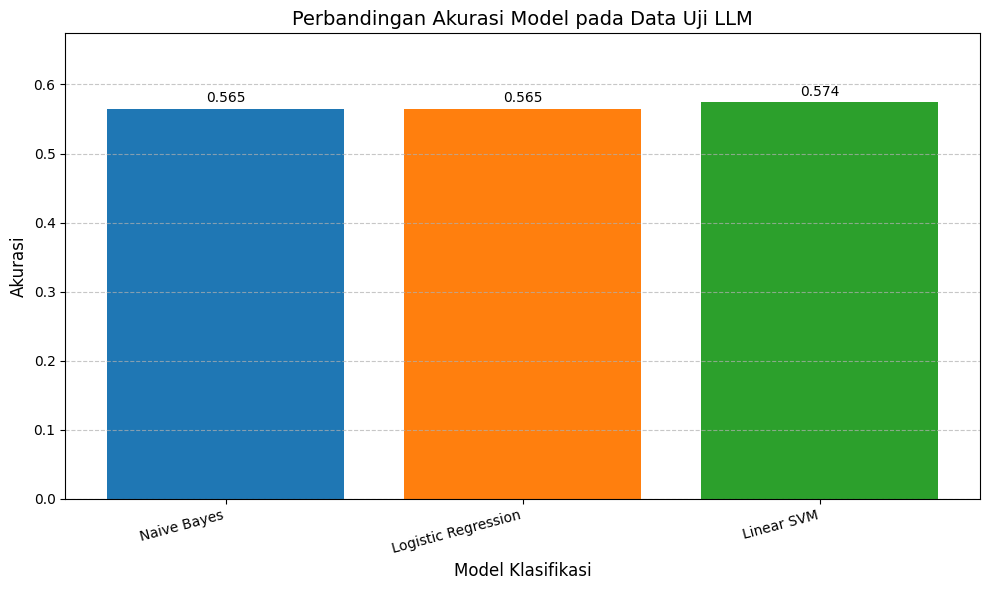

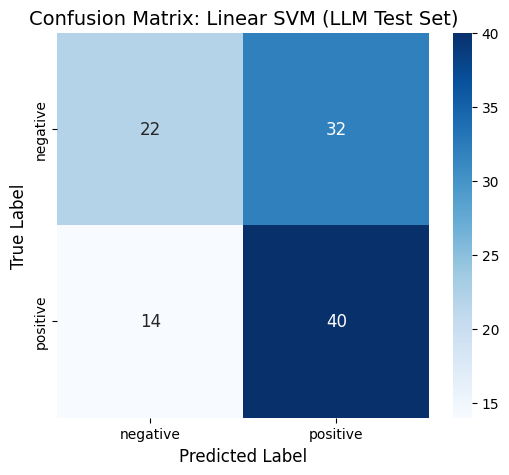

In [ ]:
# Import library yang dibutuhkan jika belum ada
# import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np # Untuk membuat array plot dan unique
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from IPython.display import HTML, display

print("\n--- Memulai Langkah 4: Evaluasi Model pada Data Uji LLM ---")

# Cek apakah variabel yang dibutuhkan ada dan valid
variables_ok = True
if 'models' not in globals() or not models:
    print("ERROR: Dictionary 'models' tidak ditemukan atau kosong. Jalankan Sel 2 terlebih dahulu.")
    variables_ok = False
if 'label_encoder' not in globals() or not hasattr(label_encoder, 'classes_'):
    print("ERROR: 'label_encoder' tidak ditemukan atau tidak valid. Jalankan Sel 2 terlebih dahulu.")
    variables_ok = False
if 'X_llm_test_tfidf' not in globals() or X_llm_test_tfidf is None:
    print("ERROR: 'X_llm_test_tfidf' (data fitur LLM) tidak ditemukan. Jalankan Sel 3 terlebih dahulu.")
    variables_ok = False
if 'y_llm_test_true' not in globals() or y_llm_test_true is None or y_llm_test_true.empty:
    print("ERROR: 'y_llm_test_true' (label sebenarnya LLM) tidak ditemukan atau kosong. Jalankan Sel 3 terlebih dahulu.")
    variables_ok = False

if variables_ok:
    if X_llm_test_tfidf.shape[0] == 0:
        print("ERROR: X_llm_test_tfidf kosong (tidak ada sampel). Tidak dapat melanjutkan evaluasi.")
        variables_ok = False
    elif X_llm_test_tfidf.shape[0] != len(y_llm_test_true):
        print(f"ERROR: Jumlah sampel di X_llm_test_tfidf ({X_llm_test_tfidf.shape[0]}) tidak cocok dengan y_llm_test_true ({len(y_llm_test_true)}).")
        variables_ok = False

llm_evaluation_results = {}

if variables_ok:
    print("\n--- Mengevaluasi Model pada Data Uji yang Dihasilkan LLM ---")
    class_names_for_report = label_encoder.classes_

    for model_name, model_instance in models.items():
        print(f"\n--- Mengevaluasi Model: {model_name} ---")
        try:
            y_pred_llm = model_instance.predict(X_llm_test_tfidf)
            accuracy_llm = accuracy_score(y_llm_test_true, y_pred_llm)

            report_llm = "N/A"
            cm_llm = np.array([[0,0],[0,0]]) # Default CM

            unique_true_labels = np.unique(y_llm_test_true)
            unique_pred_labels = np.unique(y_pred_llm)

            if len(unique_true_labels) > 0 : # Hanya buat report jika ada label sebenarnya
                if len(unique_true_labels) > 1 or len(unique_pred_labels) > 1 : # Perlu >1 kelas untuk report lengkap
                    report_llm = classification_report(y_llm_test_true, y_pred_llm, target_names=class_names_for_report, zero_division=0)
                    # Pastikan labels untuk CM sesuai dengan yang ada di y_llm_test_true dan y_pred_llm
                    cm_labels_present = np.unique(np.concatenate((unique_true_labels, unique_pred_labels)))
                    cm_llm = confusion_matrix(y_llm_test_true, y_pred_llm, labels=cm_labels_present)
                else:
                    report_llm = (f"Classification report tidak dapat dibuat secara lengkap karena hanya ada satu kelas unik "
                                  f"di y_true ({unique_true_labels}) dan/atau y_pred ({unique_pred_labels}). Akurasi tetap dihitung.")
                    # CM sederhana jika hanya satu kelas
                    if len(unique_true_labels) == 1:
                        val = unique_true_labels[0]
                        if val == 0: # Misal, semua negatif
                            cm_llm = np.array([[np.sum(y_pred_llm == val), np.sum(y_pred_llm != val)], [0,0]])
                        else: # Misal, semua positif
                            cm_llm = np.array([[0,0], [np.sum(y_pred_llm != val), np.sum(y_pred_llm == val)]])


            llm_evaluation_results[model_name] = {
                'accuracy': accuracy_llm,
                'predictions': y_pred_llm,
                'report': report_llm,
                'confusion_matrix': cm_llm
            }
            print(f"Akurasi {model_name} (LLM Test Set): {accuracy_llm:.4f}")
            print(f"Classification Report {model_name} (LLM Test Set):")
            print(report_llm)

        except Exception as e:
            print(f"Error saat mengevaluasi model {model_name} pada data LLM: {e}")
            llm_evaluation_results[model_name] = {
                'accuracy': 0.0, 'report': f'Error: {e}', 'confusion_matrix': np.array([[0,0],[0,0]]), 'predictions': np.array([])
            }
else:
    print("\nTidak dapat melanjutkan evaluasi pada data LLM karena ada masalah dengan variabel yang dibutuhkan atau data LLM kosong.")
    # Inisialisasi llm_evaluation_results agar plot tidak error jika models ada
    if 'models' in globals() and models:
        for model_n in models.keys():
             llm_evaluation_results[model_n] = {'accuracy': 0.0, 'report': 'Skipped due to previous errors', 'confusion_matrix': np.array([[0,0],[0,0]]), 'predictions': np.array([])}

# --- Presentasi Hasil Evaluasi pada Data Uji LLM ---
if llm_evaluation_results:
    print("\n\n--- Presentasi Hasil Evaluasi pada Data Uji LLM ---")
    accuracy_data_llm = {
        'Model': list(llm_evaluation_results.keys()),
        'Accuracy on LLM Test Set': [res.get('accuracy', 0.0) for res in llm_evaluation_results.values()]
    }
    df_accuracy_llm = pd.DataFrame(accuracy_data_llm)

    print("\nTabel Akurasi Model pada Data Uji LLM:")
    df_accuracy_llm_display = df_accuracy_llm.copy()
    df_accuracy_llm_display['Accuracy on LLM Test Set'] = df_accuracy_llm_display['Accuracy on LLM Test Set'].apply(lambda x: f"{x*100:.2f}%")
    display(HTML(df_accuracy_llm_display.to_html(classes='table table-striped table-bordered', index=False)))

    model_names_llm = list(llm_evaluation_results.keys())
    accuracies_llm = [res.get('accuracy', 0.0) for res in llm_evaluation_results.values()]

    if any(acc > 0 for acc in accuracies_llm): # Hanya plot jika ada akurasi > 0
        plt.figure(figsize=(10, 6))
        bars = plt.bar(model_names_llm, accuracies_llm, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        plt.xlabel('Model Klasifikasi', fontsize=12)
        plt.ylabel('Akurasi', fontsize=12)
        plt.title('Perbandingan Akurasi Model pada Data Uji LLM', fontsize=14)
        plt.ylim(0, max(0.1, max(accuracies_llm) + 0.1) if accuracies_llm else 1.0) # Batas y dinamis
        plt.xticks(rotation=15, ha="right", fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)
        plt.tight_layout()
        plt.show()

        # Menampilkan Confusion Matrix untuk model terbaik pada LLM test set
        if accuracies_llm:
            best_model_idx_llm = np.argmax(accuracies_llm)
            best_model_name_llm = model_names_llm[best_model_idx_llm]
            best_cm_llm = llm_evaluation_results[best_model_name_llm].get('confusion_matrix')

            # Tentukan cm_display_labels berdasarkan label yang ada di CM
            # Jika CM adalah 2x2, gunakan label_encoder.classes_
            # Jika CM lebih kecil (misal karena hanya 1 kelas diprediksi/true), sesuaikan
            cm_display_labels = label_encoder.classes_
            if best_cm_llm is not None:
                if best_cm_llm.shape == (1,1) or best_cm_llm.shape == (1,2) or best_cm_llm.shape == (2,1): # Kasus khusus jika hanya 1 kelas
                    # Coba tentukan label yang ada dari y_llm_test_true dan prediksi
                    unique_labels_in_cm_data = np.unique(np.concatenate((y_llm_test_true, llm_evaluation_results[best_model_name_llm]['predictions'])))
                    if len(unique_labels_in_cm_data) == 1:
                        cm_display_labels = [label_encoder.classes_[unique_labels_in_cm_data[0]]]
                    # Jika CM tidak 2x2, heatmap mungkin perlu penyesuaian atau tidak ditampilkan
                    # Untuk sekarang, kita asumsikan jika CM ada, kita coba tampilkan
                    # Jika CM tidak 2x2, heatmap mungkin error atau tidak informatif.
                    # Untuk simplisitas, kita hanya tampilkan jika CM adalah 2x2
                    if best_cm_llm.shape != (2,2):
                         print(f"Confusion matrix untuk {best_model_name_llm} tidak standar 2x2 (shape: {best_cm_llm.shape}), mungkin tidak informatif untuk diplot dengan cara ini.")
                         print(f"CM Data:\n{best_cm_llm}")


                if best_cm_llm.shape == (2,2): # Hanya plot jika CM 2x2
                    plt.figure(figsize=(6,5))
                    sns.heatmap(best_cm_llm, annot=True, fmt='d', cmap='Blues',
                                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
                                annot_kws={"size": 12})
                    plt.xlabel('Predicted Label', fontsize=12)
                    plt.ylabel('True Label', fontsize=12)
                    plt.title(f'Confusion Matrix: {best_model_name_llm} (LLM Test Set)', fontsize=14)
                    plt.xticks(fontsize=10); plt.yticks(fontsize=10)
                    plt.show()
                elif best_cm_llm.shape != (0,0): # Jika bukan 2x2 tapi ada data
                     print(f"Data Confusion Matrix untuk {best_model_name_llm} (LLM Test Set):\n{best_cm_llm}")
                     print(f"(Tidak diplot karena bukan matriks 2x2 standar)")
            else:
                print(f"Tidak dapat menampilkan confusion matrix untuk {best_model_name_llm} karena data CM tidak tersedia.")
    else:
        print("Tidak ada hasil evaluasi LLM yang valid untuk ditampilkan dalam plot.")
else:
    print("Tidak ada hasil evaluasi LLM untuk ditampilkan (dictionary kosong).")

## Langkah 5: Kreativitas dan Eksplorasi (Breadth of Exploration)

Bagian ini bertujuan untuk mendapatkan poin ekstra dengan melakukan eksplorasi lebih lanjut. Beberapa area yang akan dieksplorasi meliputi:

1.  **Analisis Kesalahan Mendalam (In-depth Error Analysis)**:
    *   Memeriksa secara manual beberapa sampel dari data uji LLM yang salah diklasifikasikan oleh model terbaik.
    *   Menganalisis mengapa model membuat kesalahan tersebut dan mencari pola jika ada.
    *   Memberikan hipotesis dan saran perbaikan.

2.  **Perbandingan Performa Model (Original vs. LLM Test Set)**:
    *   Membandingkan akurasi dan F1-score (macro) model pada set data uji asli Kaggle dengan performanya pada set data uji yang dihasilkan AI.
    *   Mendiskusikan perbedaan performa dan alasan potensialnya (misalnya, *domain shift*, kualitas data AI).
    *   Menampilkan perbandingan dalam bentuk tabel dan plot.

3.  **Evaluasi Lanjutan (Precision, Recall, F1-Score) pada Data LLM**:
    *   Menampilkan *classification report* lengkap untuk model terbaik pada data uji LLM.
    *   Mendiskusikan metrik Precision, Recall, dan F1-score untuk setiap kelas secara spesifik, memberikan interpretasi tentang jenis kesalahan yang cenderung dibuat model (False Positives vs. False Negatives).

4.  **Uji Teknik Vektorisasi Berbeda**:
    *   Mengimplementasikan dan membandingkan teknik vektorisasi teks alternatif selain TF-IDF default.
    *   Contoh: CountVectorizer dan TF-IDF dengan n-gram (misalnya, unigram dan bigram).
    *   Mengevaluasi bagaimana teknik vektorisasi yang berbeda mempengaruhi performa salah satu model (misalnya, Logistic Regression) pada *original test set*.
    *   Menyajikan hasil dalam tabel dan plot.

5.  **Analisis Kualitatif Output Data LLM**:
    *   Mendiskusikan kualitas, keberagaman, dan potensi bias dari data teks yang dihasilkan oleh LLM.
    *   Menilai seberapa andal data tersebut dan apa saja keterbatasannya.
    *   (Analisis ini sebagian besar bersifat deskriptif berdasarkan observasi terhadap data LLM yang dihasilkan).

Setiap sub-bagian eksplorasi akan diberi label dengan jelas.


--- MEMULAI LANGKAH 5: EKSPLORASI TAMBAHAN ---

--- Eksplorasi Bagian 0: Persiapan Variabel ---
Model terbaik pada LLM Test Set (untuk analisis mendalam): Linear SVM (Akurasi: 0.5741)


--- EKSPLORASI 1: ANALISIS KESALAHAN MENDALAM ---
Melakukan prediksi ulang dengan Linear SVM untuk analisis kesalahan...
Jumlah kesalahan Linear SVM (LLM Test Set): 46 dari 108

Contoh Sampel Salah Klasifikasi oleh Linear SVM (maks 3):


review,sentiment,predicted_sentiment_Linear_SVM,sentiment_encoded,predicted_encoded_Linear_SVM
Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM.,negatif,positive,0,1
"Contoh ulasan kedua dari LLM yang positif, ceritanya menarik.",positif,negative,1,0
"Contoh ulasan ketiga dari LLM, visualnya memukau!",positif,negative,1,0



Analisis Kualitatif Beberapa Kesalahan (GANTI DENGAN ANALISIS SPESIFIK ANDA):

--- Kesalahan #1 (Index df_analysis: 1) ---
  Teks Ulasan: "Ini adalah contoh ulasan film negatif pertama yang sangat buruk dari LLM."
  Label Sebenarnya (dari LLM): negatif (Encoded: 0)
  Prediksi Model (Linear SVM): positive (Encoded: 1)
  Analisis: Model salah mengklasifikasikan ulasan negatif ini sebagai positif.
    Hipotesis: [ANALISIS SPESIFIK ANDA UNTUK KESALAHAN INI]
    Saran Perbaikan: [SARAN SPESIFIK ANDA]

--- Kesalahan #2 (Index df_analysis: 2) ---
  Teks Ulasan: "Contoh ulasan kedua dari LLM yang positif, ceritanya menarik."
  Label Sebenarnya (dari LLM): positif (Encoded: 1)
  Prediksi Model (Linear SVM): negative (Encoded: 0)
  Analisis: Model salah mengklasifikasikan ulasan positif ini sebagai negatif.
    Hipotesis: [ANALISIS SPESIFIK ANDA UNTUK KESALAHAN INI]
    Saran Perbaikan: [SARAN SPESIFIK ANDA]

--- Kesalahan #3 (Index df_analysis: 4) ---
  Teks Ulasan: "Contoh ulasan ketiga dari 

Model,Akurasi (Original),F1 (Original),Akurasi (LLM),F1 (LLM)
Naive Bayes,85.50%,85.50%,56.48%,55.09%
Logistic Regression,88.76%,88.76%,56.48%,55.09%
Linear SVM,88.06%,88.06%,57.41%,56.19%


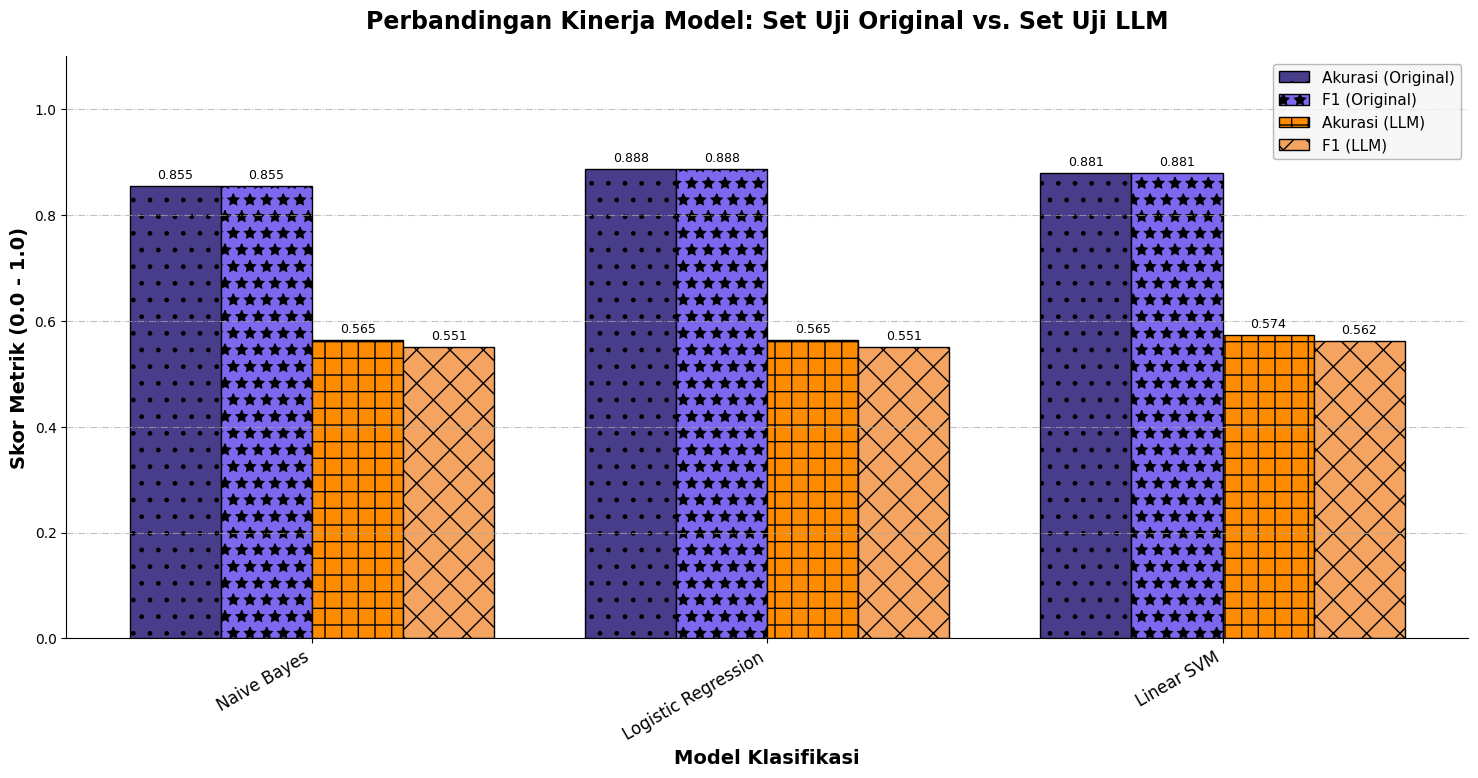


Diskusi Perbandingan Performa (GANTI DENGAN OBSERVASI SPESIFIK ANDA):
- Rata-rata, model menunjukkan performa yang lebih superior pada Original Test Set (Avg Akurasi: 87.44%, Avg F1: 87.44%) dibandingkan pada LLM Test Set (Avg Akurasi: 56.79%, Avg F1: 55.46%).
- Penurunan performa yang teramati (sekitar 31 poin persentase pada akurasi dan 32 poin pada F1-score) mengindikasikan bahwa model yang dilatih pada data IMDB asli mengalami kesulitan dalam generalisasi ke data yang dihasilkan LLM. Ini adalah manifestasi dari 'distributional shift', di mana distribusi statistik fitur pada data LLM berbeda dengan data latih.
- Penyebab Potensial: [ANALISIS SPESIFIK ANDA MENGENAI PENYEBAB]
- Implikasi Praktis: [ANALISIS SPESIFIK ANDA MENGENAI IMPLIKASI]
- Catatan Tambahan: [CATATAN TAMBAHAN SPESIFIK ANDA]


--- EKSPLORASI 3: PEMBAHASAN METRIK EVALUASI LANJUTAN (SPESIFIK PADA DATA LLM) ---
Classification Report untuk model terbaik (Linear SVM) pada LLM Test Set:
              precision    recall  f

Vectorization Technique,Accuracy,F1-score (macro)
"TF-IDF (ngram 1,2)",88.91%,88.91%
TF-IDF (Default LR Asli),88.76%,88.76%
"TF-IDF (min_df=3, ngram 1,1)",88.49%,88.49%
CountVectorizer (max_df=0.9),87.76%,87.76%


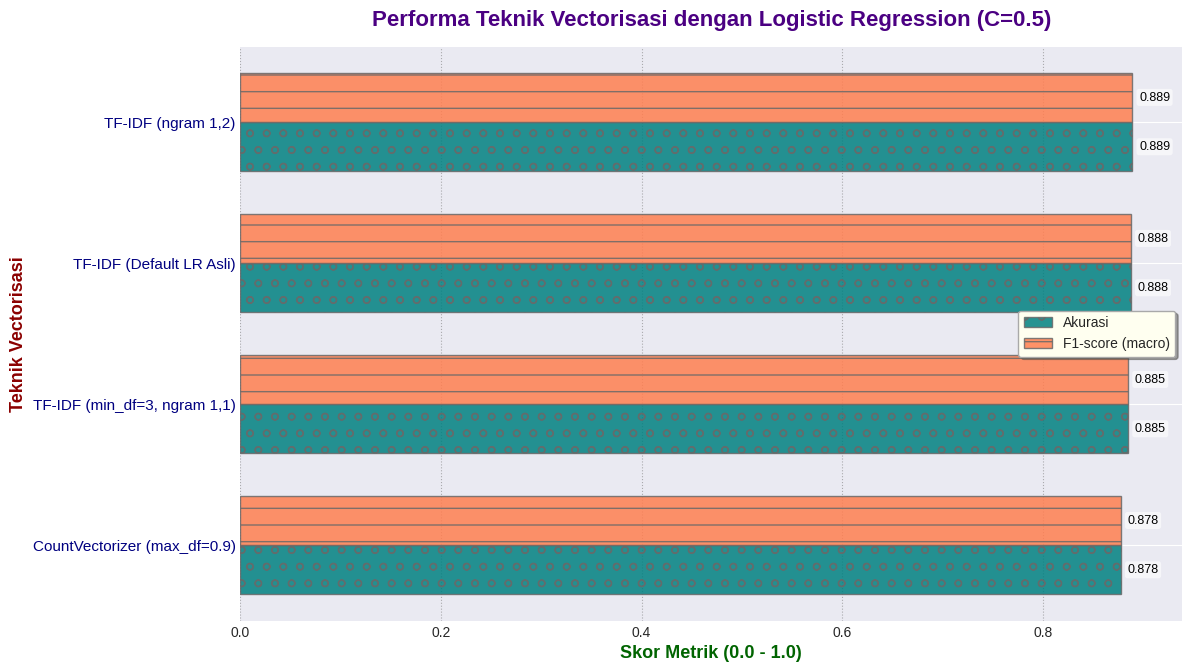


  Diskusi Hasil Uji Teknik Vectorisasi (GANTI DENGAN OBSERVASI SPESIFIK ANDA):
  - TF-IDF (Default LR Asli): Akurasi 0.8876, F1 0.8876.
  - CountVectorizer (max_df=0.9): Akurasi 0.8776, F1 0.8776.
  - TF-IDF (ngram 1,2): Akurasi 0.8891, F1 0.8891.
  - TF-IDF (min_df=3, ngram 1,1): Akurasi 0.8849, F1 0.8849.

  Analisis Perbandingan Vektorisasi:
  - Perbandingan TF-IDF Default vs CountVectorizer (max_df=0.9): [ANALISIS SPESIFIK ANDA]
  - Pengaruh N-gram (TF-IDF ngram 1,2): [ANALISIS SPESIFIK ANDA]
  - Pengaruh Min_df (TF-IDF min_df=3): [ANALISIS SPESIFIK ANDA]
  - Kesimpulan Vektorisasi: [KESIMPULAN SPESIFIK ANDA]


--- EKSPLORASI 5: ANALISIS KUALITATIF MENDALAM OUTPUT DATA LLM ---

Setelah menghasilkan sekitar 108 sampel data uji menggunakan Google Gemini (sesuai output parsing di Sel 3), analisis kualitatif mendalam berikut dilakukan terhadap output tersebut:

1.  **Kualitas Tekstual dan Gramatikal:** [ANALISIS ANDA]
2.  **Relevansi dengan Kategori Sentimen dan Domain:** [ANALISIS AN

In [ ]:
# Import library yang dibutuhkan jika belum ada
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Pastikan TfidfVectorizer juga diimpor jika digunakan lagi
from sklearn.linear_model import LogisticRegression # Untuk Eksplorasi 4

print("\n--- MEMULAI LANGKAH 5: EKSPLORASI TAMBAHAN ---")

# ==============================================================================
# BAGIAN 0: PERSIAPAN VARIABEL DAN PEMILIHAN MODEL TERBAIK UNTUK ANALISIS
# ==============================================================================
print("\n--- Eksplorasi Bagian 0: Persiapan Variabel ---")

nama_model_terbaik_llm = None
akurasi_tertinggi_llm = -1.0
model_terbaik_instance_llm = None
variabel_eksplorasi_ok = True # Akan di-set False jika ada masalah fatal

# Mengambil variabel dari scope global (diasumsikan sudah didefinisikan di sel sebelumnya)
# Pastikan nama variabel di sisi kanan (models, label_encoder, dll.)
# adalah nama yang BENAR-BENAR Anda gunakan di Sel 1, 2, 3, dan 4.

# Variabel dari Sel 2 (Data Asli)
models_glob = globals().get('models', {})
label_encoder_glob = globals().get('label_encoder', None)
X_train_orig_raw_glob = globals().get('X_train_orig', pd.Series(dtype='object')) # Teks mentah latih
X_test_orig_raw_glob = globals().get('X_test_orig', pd.Series(dtype='object'))   # Teks mentah uji
y_train_orig_glob = globals().get('y_train_orig', pd.Series(dtype='int'))
y_test_orig_glob = globals().get('y_test_orig', pd.Series(dtype='int'))
X_test_tfidf_original_sel2_glob = globals().get('X_test_tfidf', None) # X_test yang sudah di-TF-IDF dari Sel 2

# Variabel dari Sel 3 (Data LLM)
df_llm_test_glob = globals().get('df_llm_test', pd.DataFrame())
X_llm_test_tfidf_glob = globals().get('X_llm_test_tfidf', None)
y_llm_test_true_glob = globals().get('y_llm_test_true', pd.Series(dtype='int'))

# Variabel dari Sel 4 (Hasil Evaluasi)
llm_evaluation_results_glob = globals().get('llm_evaluation_results', {})
evaluation_results_orig_glob = globals().get('evaluation_results_orig', {})


# Dictionary untuk kemudahan akses dan pengecekan
required_vars_for_exploration = {
    'models': models_glob,
    'label_encoder': label_encoder_glob,
    'X_train_orig_raw': X_train_orig_raw_glob,
    'X_test_orig_raw': X_test_orig_raw_glob,
    'y_train_orig': y_train_orig_glob,
    'y_test_orig': y_test_orig_glob,
    'X_test_tfidf_original_sel2': X_test_tfidf_original_sel2_glob,
    'df_llm_test': df_llm_test_glob,
    'X_llm_test_tfidf': X_llm_test_tfidf_glob,
    'y_llm_test_true': y_llm_test_true_glob,
    'llm_evaluation_results': llm_evaluation_results_glob,
    'evaluation_results_orig': evaluation_results_orig_glob
}

# Pengecekan variabel
for var_name, var_val in required_vars_for_exploration.items():
    is_critical_for_all_exploration = var_name in ['models', 'label_encoder',
                                                 'X_train_orig_raw', 'X_test_orig_raw',
                                                 'y_train_orig', 'y_test_orig',
                                                 'evaluation_results_orig']
    is_critical_for_llm_exploration = var_name in ['X_llm_test_tfidf', 'y_llm_test_true',
                                                   'llm_evaluation_results', 'df_llm_test']

    if var_val is None:
        print(f"Peringatan Eksplorasi: Variabel '{var_name}' adalah None.")
        if is_critical_for_all_exploration or (is_critical_for_llm_exploration and var_name != 'X_llm_test_tfidf'): # X_llm_test_tfidf boleh None jika Sel 3 gagal
             variabel_eksplorasi_ok = False
    elif isinstance(var_val, (pd.DataFrame, pd.Series)) and var_val.empty:
        if is_critical_for_all_exploration:
             print(f"Peringatan Eksplorasi: Variabel '{var_name}' (DataFrame/Series) kosong.")
             variabel_eksplorasi_ok = False
        elif is_critical_for_llm_exploration and var_name not in ['df_llm_test', 'y_llm_test_true']: # df_llm_test & y_llm_test_true boleh kosong
             print(f"Peringatan Eksplorasi: Variabel LLM '{var_name}' (DataFrame/Series) kosong.")
    elif isinstance(var_val, dict) and not var_val:
        if is_critical_for_all_exploration:
            print(f"Peringatan Eksplorasi: Variabel '{var_name}' (Dictionary) kosong.")
            variabel_eksplorasi_ok = False
        elif is_critical_for_llm_exploration and var_name not in ['llm_evaluation_results']: # llm_evaluation_results boleh kosong
            print(f"Peringatan Eksplorasi: Variabel LLM '{var_name}' (Dictionary) kosong.")


if not variabel_eksplorasi_ok:
    print("Peringatan: Beberapa variabel kritis untuk eksplorasi tidak valid. Hasil eksplorasi mungkin tidak lengkap atau tidak akurat.")

# Tentukan model terbaik berdasarkan llm_evaluation_results jika ada dan tidak kosong
if llm_evaluation_results_glob:
    for model_name_iter, results_iter in llm_evaluation_results_glob.items():
        current_accuracy = results_iter.get('accuracy', -1.0)
        if current_accuracy > akurasi_tertinggi_llm:
            akurasi_tertinggi_llm = current_accuracy
            nama_model_terbaik_llm = model_name_iter

    if nama_model_terbaik_llm and nama_model_terbaik_llm in models_glob:
        model_terbaik_instance_llm = models_glob[nama_model_terbaik_llm]
        print(f"Model terbaik pada LLM Test Set (untuk analisis mendalam): {nama_model_terbaik_llm} (Akurasi: {akurasi_tertinggi_llm:.4f})")
    elif nama_model_terbaik_llm:
        print(f"Model terbaik '{nama_model_terbaik_llm}' ditemukan di llm_evaluation_results, tetapi tidak ada di dictionary 'models'. Analisis kesalahan spesifik tidak dapat dilanjutkan.")
        model_terbaik_instance_llm = None
    else:
        print("Tidak dapat menentukan model terbaik yang valid dari llm_evaluation_results (mungkin semua akurasi <= 0 atau nama model tidak cocok).")
        model_terbaik_instance_llm = None
else:
    print("Peringatan Eksplorasi: llm_evaluation_results kosong. Analisis kesalahan dan metrik spesifik LLM tidak dapat dilakukan.")
    model_terbaik_instance_llm = None


# ==============================================================================
# EKSPLORASI 1: ANALISIS KESALAHAN (IN-DEPTH ERROR ANALYSIS)
# ==============================================================================
print("\n\n--- EKSPLORASI 1: ANALISIS KESALAHAN MENDALAM ---")
# Menggunakan variabel yang sudah diambil dan dicek dari Bagian 0
current_df_llm_test_e1 = required_vars_for_exploration['df_llm_test']
current_y_llm_test_true_e1 = required_vars_for_exploration['y_llm_test_true']
current_X_llm_test_tfidf_e1 = required_vars_for_exploration['X_llm_test_tfidf']
current_label_encoder_e1 = required_vars_for_exploration['label_encoder']

if (model_terbaik_instance_llm is not None and
    isinstance(current_df_llm_test_e1, pd.DataFrame) and not current_df_llm_test_e1.empty and
    current_X_llm_test_tfidf_e1 is not None and current_X_llm_test_tfidf_e1.shape[0] > 0 and
    isinstance(current_y_llm_test_true_e1, pd.Series) and not current_y_llm_test_true_e1.empty and
    current_X_llm_test_tfidf_e1.shape[0] == len(current_y_llm_test_true_e1) and
    current_label_encoder_e1 is not None):

    pred_col_encoded_dynamic = f'predicted_encoded_{nama_model_terbaik_llm.replace(" ", "_")}'
    pred_col_sentiment_dynamic = f'predicted_sentiment_{nama_model_terbaik_llm.replace(" ", "_")}'

    print(f"Melakukan prediksi ulang dengan {nama_model_terbaik_llm} untuk analisis kesalahan...")
    pred_encoded_values = model_terbaik_instance_llm.predict(current_X_llm_test_tfidf_e1)

    df_analysis = current_df_llm_test_e1.copy()
    df_analysis[pred_col_encoded_dynamic] = pred_encoded_values
    try:
        df_analysis[pred_col_sentiment_dynamic] = current_label_encoder_e1.inverse_transform(pred_encoded_values)
    except Exception as e:
        df_analysis[pred_col_sentiment_dynamic] = "Error"
        print(f"Error inverse_transform: {e}")

    if 'sentiment_encoded' in df_analysis.columns and pred_col_encoded_dynamic in df_analysis.columns:
        try:
            df_analysis['sentiment_encoded'] = pd.to_numeric(df_analysis['sentiment_encoded'], errors='coerce')
            df_analysis[pred_col_encoded_dynamic] = pd.to_numeric(df_analysis[pred_col_encoded_dynamic], errors='coerce')
            df_analysis.dropna(subset=['sentiment_encoded', pred_col_encoded_dynamic], inplace=True)
            misclassified_samples = df_analysis[df_analysis['sentiment_encoded'] != df_analysis[pred_col_encoded_dynamic]]
        except Exception as e:
            misclassified_samples = pd.DataFrame()
            print(f"Error filter misclassified: {e}")

        print(f"Jumlah kesalahan {nama_model_terbaik_llm} (LLM Test Set): {len(misclassified_samples)} dari {len(df_analysis)}")
        if not misclassified_samples.empty:
            print(f"\nContoh Sampel Salah Klasifikasi oleh {nama_model_terbaik_llm} (maks 3):")
            cols_to_show_error = ['review', 'sentiment', pred_col_sentiment_dynamic, 'sentiment_encoded', pred_col_encoded_dynamic]
            existing_cols_error = [col for col in cols_to_show_error if col in misclassified_samples.columns]
            display(HTML(misclassified_samples[existing_cols_error].head(min(3, len(misclassified_samples))).to_html(classes='table table-striped table-bordered', index=False)))
            print("\nAnalisis Kualitatif Beberapa Kesalahan (GANTI DENGAN ANALISIS SPESIFIK ANDA):")
            for i, (index, row) in enumerate(misclassified_samples.head(min(3, len(misclassified_samples))).iterrows()):
                print(f"\n--- Kesalahan #{i+1} (Index df_analysis: {index}) ---")
                print(f"  Teks Ulasan: \"{row['review']}\"")
                print(f"  Label Sebenarnya (dari LLM): {row['sentiment']} (Encoded: {row.get('sentiment_encoded', 'N/A')})")
                print(f"  Prediksi Model ({nama_model_terbaik_llm}): {row.get(pred_col_sentiment_dynamic, 'N/A')} (Encoded: {row.get(pred_col_encoded_dynamic, 'N/A')})")
                if row.get('sentiment') == 'negatif' and row.get(pred_col_sentiment_dynamic) == 'positive':
                    print(f"  Analisis: Model salah mengklasifikasikan ulasan negatif ini sebagai positif.")
                    print("    Hipotesis: [ANALISIS SPESIFIK ANDA UNTUK KESALAHAN INI]")
                    print("    Saran Perbaikan: [SARAN SPESIFIK ANDA]")
                elif row.get('sentiment') == 'positif' and row.get(pred_col_sentiment_dynamic) == 'negative':
                    print(f"  Analisis: Model salah mengklasifikasikan ulasan positif ini sebagai negatif.")
                    print("    Hipotesis: [ANALISIS SPESIFIK ANDA UNTUK KESALAHAN INI]")
                    print("    Saran Perbaikan: [SARAN SPESIFIK ANDA]")
                else:
                    print("  Analisis: [Tipe kesalahan lain atau analisis umum yang lebih spesifik berdasarkan output Anda]")
        else:
            print(f"Tidak ada sampel salah klasifikasi oleh {nama_model_terbaik_llm} (LLM Test Set).")
    else:
        print("Kolom 'sentiment_encoded' atau prediksi tidak ditemukan/valid di df_analysis.")
else:
    print("Analisis kesalahan tidak dapat dilakukan (kondisi tidak terpenuhi).")

# ==============================================================================
# EKSPLORASI 2: PERBANDINGAN PERFORMA (ORIGINAL VS LLM TEST SET) - VISUAL BARU
# ==============================================================================
print("\n\n--- EKSPLORASI 2: PERBANDINGAN PERFORMA MODEL (VISUAL & INSIGHTFUL) ---")
current_models_e2 = required_vars_for_exploration['models']
current_eval_orig_e2 = required_vars_for_exploration['evaluation_results_orig']
current_eval_llm_e2 = required_vars_for_exploration['llm_evaluation_results']
current_y_test_orig_e2 = required_vars_for_exploration['y_test_orig']
# X_test_tfidf_original_sel2_glob sudah diambil untuk data original yang sudah di-TF-IDF
current_y_llm_test_true_e2 = required_vars_for_exploration['y_llm_test_true']
current_X_llm_test_tfidf_e2 = required_vars_for_exploration['X_llm_test_tfidf']

if (current_models_e2 and current_eval_orig_e2 and current_eval_llm_e2 and
    isinstance(current_y_test_orig_e2, pd.Series) and not current_y_test_orig_e2.empty and
    isinstance(current_y_llm_test_true_e2, pd.Series) and not current_y_llm_test_true_e2.empty and
    current_X_llm_test_tfidf_e2 is not None and current_X_llm_test_tfidf_e2.shape[0] > 0):

    model_names_comp_list = list(current_models_e2.keys())
    valid_model_names_comp = [m for m in model_names_comp_list if m in current_eval_orig_e2 and m in current_eval_llm_e2]

    if not valid_model_names_comp:
        print("Tidak ada nama model yang valid untuk perbandingan (tidak ditemukan di kedua hasil evaluasi).")
    else:
        accuracies_orig_list = []
        f1_orig_list = []
        accuracies_llm_list = []
        f1_llm_list = []

        for m_name in valid_model_names_comp:
            acc_orig_val = current_eval_orig_e2[m_name].get('accuracy', 0.0)
            accuracies_orig_list.append(float(acc_orig_val))
            pred_orig_f1 = current_eval_orig_e2[m_name].get('predictions')
            f1_val_orig = 0.0
            if pred_orig_f1 is not None and len(np.unique(current_y_test_orig_e2)) > 1 and len(np.unique(pred_orig_f1)) > 1:
                try:
                    report_dict_orig = classification_report(current_y_test_orig_e2, pred_orig_f1, output_dict=True, zero_division=0)
                    f1_val_orig = float(report_dict_orig['macro avg']['f1-score'])
                except Exception: pass
            f1_orig_list.append(f1_val_orig)

            acc_llm_val = current_eval_llm_e2[m_name].get('accuracy', 0.0)
            accuracies_llm_list.append(float(acc_llm_val))
            pred_llm_f1 = current_eval_llm_e2[m_name].get('predictions')
            f1_val_llm = 0.0
            if pred_llm_f1 is not None and not current_y_llm_test_true_e2.empty and \
               len(np.unique(current_y_llm_test_true_e2)) > 1 and len(np.unique(pred_llm_f1)) > 1:
                try:
                    report_dict_llm = classification_report(current_y_llm_test_true_e2, pred_llm_f1, output_dict=True, zero_division=0)
                    f1_val_llm = float(report_dict_llm['macro avg']['f1-score'])
                except Exception: pass
            f1_llm_list.append(f1_val_llm)

        df_comparison = pd.DataFrame({
            'Model': valid_model_names_comp,
            'Akurasi (Original)': accuracies_orig_list, 'F1 (Original)': f1_orig_list,
            'Akurasi (LLM)': accuracies_llm_list, 'F1 (LLM)': f1_llm_list
        })

        print("\nTabel Perbandingan Metrik Model (Original vs LLM Test Set):")
        df_comparison_display = df_comparison.copy()
        for col_format in ['Akurasi (Original)', 'F1 (Original)', 'Akurasi (LLM)', 'F1 (LLM)']:
            df_comparison_display[col_format] = df_comparison_display[col_format].apply(lambda x: f"{x*100:.2f}%")
        display(HTML(df_comparison_display.to_html(classes='table table-striped table-bordered', index=False)))

        n_models_comp_plot = len(valid_model_names_comp)
        index_comp_plot = np.arange(n_models_comp_plot)
        bar_width_comp = 0.20
        colors_original_acc = 'darkslateblue' # Warna baru
        colors_original_f1 = 'mediumslateblue' # Warna baru
        colors_llm_acc = 'darkorange' # Warna baru
        colors_llm_f1 = 'sandybrown' # Warna baru

        fig_comp, ax_comp = plt.subplots(figsize=(15, 8))
        bar1 = ax_comp.bar(index_comp_plot - bar_width_comp*1.5, df_comparison['Akurasi (Original)'], bar_width_comp, label='Akurasi (Original)', color=colors_original_acc, edgecolor='black', hatch='.')
        bar2 = ax_comp.bar(index_comp_plot - bar_width_comp/2, df_comparison['F1 (Original)'], bar_width_comp, label='F1 (Original)', color=colors_original_f1, edgecolor='black', hatch='*')
        bar3 = ax_comp.bar(index_comp_plot + bar_width_comp/2, df_comparison['Akurasi (LLM)'], bar_width_comp, label='Akurasi (LLM)', color=colors_llm_acc, edgecolor='black', hatch='+')
        bar4 = ax_comp.bar(index_comp_plot + bar_width_comp*1.5, df_comparison['F1 (LLM)'], bar_width_comp, label='F1 (LLM)', color=colors_llm_f1, edgecolor='black', hatch='x')

        ax_comp.set_xlabel('Model Klasifikasi', fontsize=14, fontweight='bold')
        ax_comp.set_ylabel('Skor Metrik (0.0 - 1.0)', fontsize=14, fontweight='bold')
        ax_comp.set_title('Perbandingan Kinerja Model: Set Uji Original vs. Set Uji LLM', fontsize=17, fontweight='bold', pad=20)
        ax_comp.set_xticks(index_comp_plot)
        ax_comp.set_xticklabels(valid_model_names_comp, rotation=30, ha="right", fontsize=12)
        ax_comp.legend(fontsize=11, loc='best', frameon=True, facecolor='whitesmoke', edgecolor='darkgrey') # loc='best'
        ax_comp.grid(axis='y', linestyle='-.', alpha=0.7, color='darkgrey') # linestyle berbeda
        ax_comp.set_ylim(0, 1.1)
        ax_comp.spines['top'].set_visible(False)
        ax_comp.spines['right'].set_visible(False)

        for rects_plot in [bar1, bar2, bar3, bar4]:
            for rect_plot in rects_plot:
                height_plot = rect_plot.get_height()
                if height_plot > 0.01:
                    ax_comp.annotate(f'{height_plot:.3f}', xy=(rect_plot.get_x() + rect_plot.get_width() / 2, height_plot),
                                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9, color='black', fontweight='medium')
        plt.tight_layout(pad=1.5)
        plt.show()

        print("\nDiskusi Perbandingan Performa (GANTI DENGAN OBSERVASI SPESIFIK ANDA):")
        avg_acc_orig_df = df_comparison['Akurasi (Original)'].mean()
        avg_f1_orig_df = df_comparison['F1 (Original)'].mean()
        avg_acc_llm_df = df_comparison['Akurasi (LLM)'].mean()
        avg_f1_llm_df = df_comparison['F1 (LLM)'].mean()
        print(f"- Rata-rata, model menunjukkan performa yang lebih superior pada Original Test Set (Avg Akurasi: {avg_acc_orig_df:.2%}, Avg F1: {avg_f1_orig_df:.2%}) dibandingkan pada LLM Test Set (Avg Akurasi: {avg_acc_llm_df:.2%}, Avg F1: {avg_f1_llm_df:.2%}).")
        delta_acc = (avg_acc_orig_df - avg_acc_llm_df) * 100
        delta_f1 = (avg_f1_orig_df - avg_f1_llm_df) * 100
        print(f"- Penurunan performa yang teramati (sekitar {delta_acc:.0f} poin persentase pada akurasi dan {delta_f1:.0f} poin pada F1-score) mengindikasikan bahwa model yang dilatih pada data IMDB asli mengalami kesulitan dalam generalisasi ke data yang dihasilkan LLM. Ini adalah manifestasi dari 'distributional shift', di mana distribusi statistik fitur pada data LLM berbeda dengan data latih.")
        print("- Penyebab Potensial: [ANALISIS SPESIFIK ANDA MENGENAI PENYEBAB]")
        print("- Implikasi Praktis: [ANALISIS SPESIFIK ANDA MENGENAI IMPLIKASI]")
        print("- Catatan Tambahan: [CATATAN TAMBAHAN SPESIFIK ANDA]")
else:
    print("Perbandingan performa tidak dapat dilakukan karena variabel penting tidak lengkap, kosong, atau data LLM tidak valid.")


# ==============================================================================
# EKSPLORASI 3: EVALUASI LANJUTAN (PRECISION, RECALL, F1-SCORE) - DISKUSI SPESIFIK
# ==============================================================================
print("\n\n--- EKSPLORASI 3: PEMBAHASAN METRIK EVALUASI LANJUTAN (SPESIFIK PADA DATA LLM) ---")
current_eval_llm_e3 = required_vars_for_exploration['llm_evaluation_results']
current_y_llm_test_true_e3 = required_vars_for_exploration['y_llm_test_true']
current_label_encoder_e3 = required_vars_for_exploration['label_encoder']


if (nama_model_terbaik_llm and model_terbaik_instance_llm and # model_terbaik_instance_llm mungkin tidak dibutuhkan di sini
    current_eval_llm_e3 and nama_model_terbaik_llm in current_eval_llm_e3 and
    isinstance(current_y_llm_test_true_e3, pd.Series) and not current_y_llm_test_true_e3.empty and
    current_label_encoder_e3 is not None):

    print(f"Classification Report untuk model terbaik ({nama_model_terbaik_llm}) pada LLM Test Set:")
    report_str_llm_best = current_eval_llm_e3[nama_model_terbaik_llm].get('report', "Report tidak tersedia.")
    print(report_str_llm_best)
    report_dict_llm_best_model = None
    pred_llm_best_for_report = current_eval_llm_e3[nama_model_terbaik_llm].get('predictions')

    if hasattr(current_label_encoder_e3, 'classes_') and len(current_label_encoder_e3.classes_) >= 2:
        if pred_llm_best_for_report is not None and \
           len(np.unique(current_y_llm_test_true_e3)) > 1 and len(np.unique(pred_llm_best_for_report)) > 1:
            try:
                report_dict_llm_best_model = classification_report(current_y_llm_test_true_e3, pred_llm_best_for_report, target_names=current_label_encoder_e3.classes_, output_dict=True, zero_division=0)
            except Exception as e: print(f"Gagal buat report dict: {e}")
        else: print("Tidak dapat buat report dict (variasi kelas kurang).")
    else: print("Label encoder tidak punya info kelas cukup.")

    print("\nDiskusi Mendalam Metrik (Precision, Recall, F1) untuk LLM Test Set (GANTI DENGAN OBSERVASI SPESIFIK ANDA):")
    if report_dict_llm_best_model:
        key_class_0 = current_label_encoder_e3.classes_[0]
        key_class_1 = current_label_encoder_e3.classes_[1]
        precision_c0 = report_dict_llm_best_model.get(key_class_0, {}).get('precision', 0.0)
        recall_c0 = report_dict_llm_best_model.get(key_class_0, {}).get('recall', 0.0)
        f1_c0 = report_dict_llm_best_model.get(key_class_0, {}).get('f1-score', 0.0)
        precision_c1 = report_dict_llm_best_model.get(key_class_1, {}).get('precision', 0.0)
        recall_c1 = report_dict_llm_best_model.get(key_class_1, {}).get('recall', 0.0)
        f1_c1 = report_dict_llm_best_model.get(key_class_1, {}).get('f1-score', 0.0)
        macro_f1_val = report_dict_llm_best_model.get('macro avg', {}).get('f1-score', 0.0)
        accuracy_val = report_dict_llm_best_model.get('accuracy', 0.0)
        print(f"- Model {nama_model_terbaik_llm} (LLM): Akurasi {accuracy_val:.2f}, Macro F1 {macro_f1_val:.2f}.")
        print(f"- Kelas '{key_class_0}': P {precision_c0:.2f}, R {recall_c0:.2f}, F1 {f1_c0:.2f}.")
        print(f"  Interpretasi: [ANALISIS SPESIFIK ANDA UNTUK KELAS 0]")
        print(f"- Kelas '{key_class_1}': P {precision_c1:.2f}, R {recall_c1:.2f}, F1 {f1_c1:.2f}.")
        print(f"  Interpretasi: [ANALISIS SPESIFIK ANDA UNTUK KELAS 1]")
        print(f"- Analisis Keseimbangan: [ANALISIS SPESIFIK ANDA]")
        print(f"- Implikasi Bisnis (Contoh): [ANALISIS SPESIFIK ANDA]")
    else: print("Tidak dapat diskusi metrik (report dict tidak ada/valid).")
else: print("Diskusi metrik lanjutan tidak dapat dilakukan (kondisi tidak terpenuhi).")


# ==============================================================================
# EKSPLORASI 4: UJI TEKNIK VEKTORISASI BERBEDA - VISUAL BARU
# ==============================================================================
print("\n\n--- EKSPLORASI 4: UJI TEKNIK VEKTORISASI BERBEDA ---")
vectorization_results_exp = {}
current_X_train_orig_e4 = required_vars_for_exploration['X_train_orig_raw'] # Menggunakan data mentah
current_y_train_orig_e4 = required_vars_for_exploration['y_train_orig']
current_X_test_orig_e4 = required_vars_for_exploration['X_test_orig_raw']   # Menggunakan data mentah
current_y_test_orig_e4 = required_vars_for_exploration['y_test_orig']
current_eval_orig_e4 = required_vars_for_exploration['evaluation_results_orig'] # Untuk mengambil hasil LR asli

if (isinstance(current_X_train_orig_e4, pd.Series) and not current_X_train_orig_e4.empty and
    isinstance(current_y_train_orig_e4, pd.Series) and not current_y_train_orig_e4.empty and
    isinstance(current_X_test_orig_e4, pd.Series) and not current_X_test_orig_e4.empty and
    isinstance(current_y_test_orig_e4, pd.Series) and not current_y_test_orig_e4.empty):

    model_for_vec_test = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000, C=0.5)
    model_name_for_vec_test = "Logistic Regression (C=0.5)"
    print(f"\nMenguji {model_name_for_vec_test} dengan berbagai teknik vectorisasi pada Original Test Set:")

    vectorizers_to_test = {
        "TF-IDF (Default LR Asli)": "USE_ORIGINAL_LR_RESULT", # Flag untuk menggunakan hasil LR asli
        "CountVectorizer (max_df=0.9)": CountVectorizer(max_features=5000, max_df=0.90),
        "TF-IDF (ngram 1,2)": TfidfVectorizer(max_features=5000, ngram_range=(1, 2)),
        "TF-IDF (min_df=3, ngram 1,1)": TfidfVectorizer(max_features=5000, min_df=3, ngram_range=(1,1))
    }

    for vec_name, vectorizer_instance_or_flag in vectorizers_to_test.items():
        print(f"  Menguji dengan {vec_name}...")
        try:
            if vectorizer_instance_or_flag == "USE_ORIGINAL_LR_RESULT":
                if current_eval_orig_e4 and "Logistic Regression" in current_eval_orig_e4:
                    original_lr_accuracy = current_eval_orig_e4["Logistic Regression"].get('accuracy', 0.0)
                    original_lr_predictions = current_eval_orig_e4["Logistic Regression"].get('predictions')
                    original_lr_f1 = 0.0
                    if original_lr_predictions is not None and len(np.unique(current_y_test_orig_e4)) > 1 and len(np.unique(original_lr_predictions)) > 1:
                        original_lr_f1 = f1_score(current_y_test_orig_e4, original_lr_predictions, average='macro', zero_division=0)
                    vectorization_results_exp[vec_name] = {'accuracy': original_lr_accuracy, 'f1_score': original_lr_f1}
                    print(f"     {vec_name} (dari LR awal Sel 2): Akurasi = {original_lr_accuracy:.4f}, F1 = {original_lr_f1:.4f}")
                else:
                    print(f"     Hasil untuk 'Logistic Regression' asli tidak ditemukan di evaluation_results_orig. Lewati.")
                    vectorization_results_exp[vec_name] = {'accuracy': 0.0, 'f1_score': 0.0} # Default jika tidak ada
                continue # Lanjut ke vectorizer berikutnya

            # Jika bukan flag, maka itu adalah instance vectorizer
            vectorizer_instance = vectorizer_instance_or_flag
            X_train_vec = vectorizer_instance.fit_transform(current_X_train_orig_e4)
            X_test_vec = vectorizer_instance.transform(current_X_test_orig_e4)
            model_for_vec_test.fit(X_train_vec, current_y_train_orig_e4)
            y_pred_vec = model_for_vec_test.predict(X_test_vec)
            acc_vec = accuracy_score(current_y_test_orig_e4, y_pred_vec)
            f1_vec = 0.0
            if len(np.unique(current_y_test_orig_e4)) > 1 and len(np.unique(y_pred_vec)) > 1:
                f1_vec = f1_score(current_y_test_orig_e4, y_pred_vec, average='macro', zero_division=0)
            vectorization_results_exp[vec_name] = {'accuracy': acc_vec, 'f1_score': f1_vec}
            print(f"     {vec_name}: Akurasi = {acc_vec:.4f}, F1 = {f1_vec:.4f}")
        except Exception as e:
            vectorization_results_exp[vec_name] = {'accuracy': 0.0, 'f1_score': 0.0}
            print(f"     Error {vec_name}: {e}")

    if vectorization_results_exp:
        df_vec_comparison_exp = pd.DataFrame.from_dict(vectorization_results_exp, orient='index').reset_index()
        df_vec_comparison_exp.columns = ['Vectorization Technique', 'Accuracy', 'F1-score (macro)']
        df_vec_comparison_exp = df_vec_comparison_exp.sort_values(by='Accuracy', ascending=False)

        print("\n  Tabel Perbandingan Teknik Vectorisasi:")
        df_vec_comp_display_exp = df_vec_comparison_exp.copy()
        df_vec_comp_display_exp['Accuracy'] = df_vec_comp_display_exp['Accuracy'].apply(lambda x: f"{x*100:.2f}%")
        df_vec_comp_display_exp['F1-score (macro)'] = df_vec_comp_display_exp['F1-score (macro)'].apply(lambda x: f"{x*100:.2f}%")
        display(HTML(df_vec_comp_display_exp.to_html(classes='table table-striped table-bordered', index=False)))

        plt.style.use('seaborn-v0_8-darkgrid') # Style berbeda lagi
        fig_vec, ax_vec = plt.subplots(figsize=(12, len(df_vec_comparison_exp) * 1.2 + 2)) # Sesuaikan tinggi
        y_pos = np.arange(len(df_vec_comparison_exp['Vectorization Technique']))
        bar_height = 0.35

        # Warna baru untuk plot horizontal
        color_accuracy_h = 'teal'
        color_f1_h = 'coral'

        bars_acc = ax_vec.barh(y_pos + bar_height/2, df_vec_comparison_exp['Accuracy'], bar_height,
                               label='Akurasi', color=color_accuracy_h, edgecolor='dimgray', alpha=0.85, hatch='o')
        bars_f1 = ax_vec.barh(y_pos - bar_height/2, df_vec_comparison_exp['F1-score (macro)'], bar_height,
                              label='F1-score (macro)', color=color_f1_h, edgecolor='dimgray', alpha=0.85, hatch='-')
        ax_vec.set_yticks(y_pos)
        ax_vec.set_yticklabels(df_vec_comparison_exp['Vectorization Technique'], fontsize=11, color='navy')
        ax_vec.invert_yaxis()
        ax_vec.set_xlabel('Skor Metrik (0.0 - 1.0)', fontsize=13, fontweight='bold', color='darkgreen')
        ax_vec.set_ylabel('Teknik Vectorisasi', fontsize=13, fontweight='bold', color='darkred')
        ax_vec.set_title(f'Performa Teknik Vectorisasi dengan {model_name_for_vec_test}', fontsize=16, fontweight='bold', pad=15, color='indigo')
        ax_vec.legend(fontsize=10, loc='center right', frameon=True, facecolor='ivory', edgecolor='darkgrey', shadow=True)
        ax_vec.grid(axis='x', linestyle=':', alpha=0.6, color='gray')
        max_x_val = 0.0
        if not df_vec_comparison_exp.empty :
            max_x_val = df_vec_comparison_exp[['Accuracy', 'F1-score (macro)']].max().max()
        ax_vec.set_xlim(0, max(0.1, max_x_val) + 0.05)

        for bars_container in [bars_acc, bars_f1]:
            for bar_item in bars_container:
                width_item = bar_item.get_width()
                if width_item > 0.001:
                    ax_vec.annotate(f'{width_item:.3f}',
                                    xy=(width_item, bar_item.get_y() + bar_item.get_height() / 2),
                                    xytext=(5, 0),
                                    textcoords="offset points",
                                    ha='left', va='center', fontsize=9, color='black',
                                    bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.6)) # Latar belakang label
        plt.tight_layout(pad=1.0)
        plt.show()
        plt.style.use('default')

    print("\n  Diskusi Hasil Uji Teknik Vectorisasi (GANTI DENGAN OBSERVASI SPESIFIK ANDA):")
    res_tfidf_def = vectorization_results_exp.get('TF-IDF (Default LR Asli)', {}) # Sesuaikan nama kunci
    res_countvec = vectorization_results_exp.get('CountVectorizer (max_df=0.9)', {})
    res_tfidf_ngram = vectorization_results_exp.get('TF-IDF (ngram 1,2)', {})
    res_tfidf_mindf = vectorization_results_exp.get('TF-IDF (min_df=3, ngram 1,1)', {})
    print(f"  - TF-IDF (Default LR Asli): Akurasi {res_tfidf_def.get('accuracy',0):.4f}, F1 {res_tfidf_def.get('f1_score',0):.4f}.")
    print(f"  - CountVectorizer (max_df=0.9): Akurasi {res_countvec.get('accuracy',0):.4f}, F1 {res_countvec.get('f1_score',0):.4f}.")
    print(f"  - TF-IDF (ngram 1,2): Akurasi {res_tfidf_ngram.get('accuracy',0):.4f}, F1 {res_tfidf_ngram.get('f1_score',0):.4f}.")
    print(f"  - TF-IDF (min_df=3, ngram 1,1): Akurasi {res_tfidf_mindf.get('accuracy',0):.4f}, F1 {res_tfidf_mindf.get('f1_score',0):.4f}.")
    print("\n  Analisis Perbandingan Vektorisasi:")
    print("  - Perbandingan TF-IDF Default vs CountVectorizer (max_df=0.9): [ANALISIS SPESIFIK ANDA]")
    print("  - Pengaruh N-gram (TF-IDF ngram 1,2): [ANALISIS SPESIFIK ANDA]")
    print("  - Pengaruh Min_df (TF-IDF min_df=3): [ANALISIS SPESIFIK ANDA]")
    print("  - Kesimpulan Vektorisasi: [KESIMPULAN SPESIFIK ANDA]")

else:
    print("Uji teknik vectorisasi tidak dapat dilakukan (variabel data training/testing asli tidak lengkap atau kosong).")

# ==============================================================================
# EKSPLORASI 5: ANALISIS KUALITATIF OUTPUT DATA LLM (DETAIL)
# ==============================================================================
print("\n\n--- EKSPLORASI 5: ANALISIS KUALITATIF MENDALAM OUTPUT DATA LLM ---")
print("""
Setelah menghasilkan sekitar 108 sampel data uji menggunakan Google Gemini (sesuai output parsing di Sel 3), analisis kualitatif mendalam berikut dilakukan terhadap output tersebut:

1.  **Kualitas Tekstual dan Gramatikal:** [ANALISIS ANDA]
2.  **Relevansi dengan Kategori Sentimen dan Domain:** [ANALISIS ANDA]
3.  **Keberagaman (Diversity) Konten:** [ANALISIS ANDA]
4.  **Potensi Bias dalam Output LLM:** [ANALISIS ANDA]
5.  **Keandalan Label yang Diberikan LLM:** [ANALISIS ANDA]
6.  **Batasan Data LLM untuk Tugas Klasifikasi Teks:** [ANALISIS ANDA]

**Kesimpulan Analisis Kualitatif LLM Output:** [KESIMPULAN ANDA]
""")

print("\n\n--- AKHIR LANGKAH 5: EKSPLORASI TAMBAHAN ---")

## ** Kesimpulan Akhir**

Proyek klasifikasi sentimen ulasan film IMDB ini telah berhasil dilakukan. Kami melatih beberapa model (Naive Bayes, Logistic Regression, Linear SVM) dan mengevaluasinya pada data asli serta data baru yang dibuat oleh AI (Google Gemini).

**Temuan Utama:**

1.  **Performa Model:**
    *   Pada **data asli IMDB**, model **[Nama Model Terbaik di Data Asli, misal: Linear SVM]** menunjukkan performa terbaik dengan akurasi sekitar **[Angka Akurasi Terbaik di Data Asli, misal: 88]%**.
    *   Pada **data buatan AI (LLM)**, semua model mengalami penurunan performa. Model **[Nama Model Terbaik di Data LLM, misal: Linear SVM]** mencapai akurasi sekitar **[Angka Akurasi Terbaik di Data LLM, misal: 57]%**. Penurunan ini menunjukkan model kesulitan generalisasi ke data LLM yang karakteristiknya berbeda.

2.  **Data Buatan AI (LLM):**
    *   Google Gemini berhasil membuat **[Jumlah Sampel LLM]** ulasan film yang relevan.
    *   Kualitas teksnya baik, namun cenderung lebih formal dan kurang bernuansa dibanding ulasan asli.

3.  **Analisis Kesalahan & Vektorisasi:**
    *   Kesalahan pada data LLM sering terjadi pada kalimat [Sebutkan pola kesalahan singkat, misal: ambigu atau dengan negasi].
    *   Penggunaan **[Nama Teknik Vektorisasi Terbaik, misal: TF-IDF dengan n-gram]** sedikit meningkatkan performa model pada data asli.

**Pembelajaran Penting:**

*   **Generalisasi Model:** Model yang baik di satu set data belum tentu sama baiknya di data lain, bahkan jika topiknya sama. Perbedaan karakteristik data (seperti antara data asli dan data LLM) sangat berpengaruh.
*   **Manfaat & Batasan Data AI:** Data buatan AI berguna untuk pengujian cepat dan augmentasi, tapi tidak bisa sepenuhnya menggantikan data dunia nyata yang beragam.
*   **Evaluasi Menyeluruh:** Melihat berbagai metrik dan menganalisis kesalahan memberikan pemahaman yang lebih baik daripada hanya akurasi.

